In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bitcoin-pulse-market-trends-and-fear-dataset/Bitcoin Pulse  Hourly Dataset from Markets Trends and Fear.csv
/kaggle/input/bitcoin-pulse-market-trends-and-fear-dataset/merged_fix_to_hour.csv


# Data Loading and Preprocessing

In [2]:
df = pd.read_csv('/kaggle/input/bitcoin-pulse-market-trends-and-fear-dataset/Bitcoin Pulse  Hourly Dataset from Markets Trends and Fear.csv')
df_mer = pd.read_csv('/kaggle/input/bitcoin-pulse-market-trends-and-fear-dataset/merged_fix_to_hour.csv')

In [3]:
df

,timestamp,BNB_USDT_1h_open,BNB_USDT_1h_high,BNB_USDT_1h_low,BNB_USDT_1h_close,BNB_USDT_1h_volume,BTC_USDT_1h_open,BTC_USDT_1h_high,BTC_USDT_1h_low,BTC_USDT_1h_close,...,Open_sp500,Volume_sp500,btc_dominance,altcoin_market_cap,fear_greed_index,trend_bitcoin,trend_buy_crypto,google_trends_bitcoin,google_trends_buy_crypto,open_interest
0,2023-04-09 00:00:00,310.5739,311.1801,310.4821,311.1801,28.71700,27943.39,28073.95,27930.31,28035.04,...,4085.199951,0.0,19.43,6.817052e+11,61.0,38.0,17.0,38.0,17.0,8.142427e+09
1,2023-04-09 01:00:00,311.1801,311.6257,311.1489,311.6132,15.98000,28035.04,28080.00,28029.69,28075.72,...,4085.199951,0.0,19.43,6.817052e+11,61.0,38.0,17.0,38.0,17.0,8.142427e+09
2,2023-04-09 02:00:00,311.6132,311.8623,311.2814,311.2814,37.26500,28075.72,28080.84,28027.47,28033.86,...,4085.199951,0.0,19.43,6.817052e+11,61.0,38.0,17.0,38.0,17.0,8.142427e+09
3,2023-04-09 03:00:00,311.2814,311.4965,311.0072,311.2450,22.83600,28033.86,28047.09,28019.16,28025.87,...,4085.199951,0.0,19.43,6.817052e+11,61.0,38.0,17.0,38.0,17.0,8.142427e+09
4,2023-04-09 04:00:00,311.2450,311.3736,311.0723,311.1659,44.53500,28025.87,28038.02,28016.28,28036.28,...,4085.199951,0.0,19.43,6.817052e+11,61.0,38.0,17.0,38.0,17.0,8.142427e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17511,2025-04-07 15:00:00,555.8500,559.2600,549.2700,552.3200,1141.83635,79035.30,79365.00,77533.20,78479.20,...,5123.620117,817836000.0,14.11,1.123056e+12,34.0,55.0,25.0,55.0,25.0,2.490140e+10
17512,2025-04-07 16:00:00,552.3200,552.9900,546.5800,547.0500,479.15763,78479.20,78581.20,77317.20,77432.80,...,5123.620117,817836000.0,14.11,1.123056e+12,34.0,55.0,25.0,55.0,25.0,2.490140e+10
17513,2025-04-07 17:00:00,547.0500,557.2200,547.0500,556.2200,873.68726,77432.80,79209.80,77425.20,79070.00,...,5123.620117,817836000.0,14.11,1.123056e+12,34.0,55.0,25.0,55.0,25.0,2.490140e+10
17514,2025-04-07 18:00:00,556.2200,557.3700,552.9300,553.7000,223.98799,79070.00,79371.30,78513.30,78970.00,...,5123.620117,817836000.0,14.11,1.123056e+12,34.0,55.0,25.0,55.0,25.0,2.490140e+10


In [4]:
df_mer.head()

,Datetime,BNB_USDT_1h_open,BNB_USDT_1h_high,BNB_USDT_1h_low,BNB_USDT_1h_close,BNB_USDT_1h_volume,BTC_USDT_1h_open,BTC_USDT_1h_high,BTC_USDT_1h_low,BTC_USDT_1h_close,...,VIX_Close ^VIX,VIX_High ^VIX,VIX_Low ^VIX,VIX_Open ^VIX,VIX_Volume ^VIX,funding_rate,fear_gread_index,open_interest,google_trends_buy_crypto,google_trends_bitcoin
0,2023-04-16 00:00:00,333.0455,333.8584,332.3852,332.3852,80.49008,30293.71,30316.77,30275.00,30277.44,...,17.59,17.620001,17.58,17.58,0.0,0.0001,68.0,51018.926,20,33
1,2023-04-16 01:00:00,332.3852,332.3970,330.1126,332.1377,335.75052,30277.44,30277.44,30122.74,30240.00,...,17.59,17.620001,17.58,17.58,0.0,0.0001,68.0,51018.926,20,33
2,2023-04-16 02:00:00,332.1377,332.5400,332.0705,332.2934,88.40229,30240.00,30278.35,30230.01,30267.06,...,17.59,17.620001,17.58,17.58,0.0,0.0001,68.0,51018.926,20,33
3,2023-04-16 03:00:00,332.2934,332.5482,331.8273,332.2009,59.45825,30267.06,30268.67,30233.79,30248.96,...,17.59,17.620001,17.58,17.58,0.0,0.0001,68.0,51018.926,20,33
4,2023-04-16 04:00:00,332.2009,333.0205,331.9821,333.0055,115.57138,30248.96,30307.60,30248.96,30302.08,...,17.59,17.620001,17.58,17.58,0.0,0.0001,68.0,51018.926,20,33


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17516 entries, 0 to 17515
Data columns (total 99 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   timestamp                 17516 non-null  object 
 1   BNB_USDT_1h_open          17516 non-null  float64
 2   BNB_USDT_1h_high          17516 non-null  float64
 3   BNB_USDT_1h_low           17516 non-null  float64
 4   BNB_USDT_1h_close         17516 non-null  float64
 5   BNB_USDT_1h_volume        17516 non-null  float64
 6   BTC_USDT_1h_open          17516 non-null  float64
 7   BTC_USDT_1h_high          17516 non-null  float64
 8   BTC_USDT_1h_low           17516 non-null  float64
 9   BTC_USDT_1h_close         17516 non-null  float64
 10  BTC_USDT_1h_volume        17516 non-null  float64
 11  DOGE_USDT_1h_open         17516 non-null  float64
 12  DOGE_USDT_1h_high         17516 non-null  float64
 13  DOGE_USDT_1h_low          17516 non-null  float64
 14  DOGE_U

In [6]:
df = df.drop(columns=['BNB_USDT_1h_open', 'BNB_USDT_1h_high', 'BNB_USDT_1h_low',
       'BNB_USDT_1h_close', 'BNB_USDT_1h_volume', 'SOL_USDT_1h_open',
       'SOL_USDT_1h_high', 'SOL_USDT_1h_low', 'SOL_USDT_1h_close',
       'SOL_USDT_1h_volume', 'XRP_USDT_1h_open', 'XRP_USDT_1h_high',
       'XRP_USDT_1h_low', 'XRP_USDT_1h_close', 'XRP_USDT_1h_volume',
       'Close_ibovespa', 'High_ibovespa', 'Low_ibovespa', 'Open_ibovespa',
       'Volume_ibovespa', 'Close_ipc_mexico', 'High_ipc_mexico',
       'Low_ipc_mexico', 'Open_ipc_mexico', 'Volume_ipc_mexico', 'Close_dax',
       'High_dax', 'Low_dax', 'Open_dax', 'Volume_dax', 'Close_nasdaq',
       'High_nasdaq', 'Low_nasdaq', 'Open_nasdaq', 'Volume_nasdaq',
       'Close_russell_2000', 'High_russell_2000', 'Low_russell_2000',
       'Open_russell_2000', 'Volume_russell_2000', 'Close_vix', 'High_vix',
       'Low_vix', 'Open_vix', 'Volume_vix', 'Close_cac_40', 'High_cac_40',
       'Low_cac_40', 'Open_cac_40', 'Volume_cac_40', 'Close_euro_stoxx_50',
       'High_euro_stoxx_50', 'Low_euro_stoxx_50', 'Open_euro_stoxx_50',
       'Volume_euro_stoxx_50', 'Close_dow_jones', 'High_dow_jones',
       'Low_dow_jones', 'Open_dow_jones', 'Volume_dow_jones', 'Close_ftse_100',
       'High_ftse_100', 'Low_ftse_100', 'Open_ftse_100', 'Volume_ftse_100',
       'Close_sptsx', 'High_sptsx', 'Low_sptsx', 'Open_sptsx', 'Volume_sptsx',
       'Close_sp500', 'High_sp500', 'Low_sp500', 'Open_sp500', 'Volume_sp500'])

In [7]:
df

,timestamp,BTC_USDT_1h_open,BTC_USDT_1h_high,BTC_USDT_1h_low,BTC_USDT_1h_close,BTC_USDT_1h_volume,DOGE_USDT_1h_open,DOGE_USDT_1h_high,DOGE_USDT_1h_low,DOGE_USDT_1h_close,...,ETH_USDT_1h_close,ETH_USDT_1h_volume,btc_dominance,altcoin_market_cap,fear_greed_index,trend_bitcoin,trend_buy_crypto,google_trends_bitcoin,google_trends_buy_crypto,open_interest
0,2023-04-09 00:00:00,27943.39,28073.95,27930.31,28035.04,57.560631,0.08134,0.08213,0.08132,0.08193,...,1854.64,901.96459,19.43,6.817052e+11,61.0,38.0,17.0,38.0,17.0,8.142427e+09
1,2023-04-09 01:00:00,28035.04,28080.00,28029.69,28075.72,21.191172,0.08193,0.08245,0.08189,0.08211,...,1858.58,652.34164,19.43,6.817052e+11,61.0,38.0,17.0,38.0,17.0,8.142427e+09
2,2023-04-09 02:00:00,28075.72,28080.84,28027.47,28033.86,38.007310,0.08211,0.08227,0.08191,0.08192,...,1854.41,825.79579,19.43,6.817052e+11,61.0,38.0,17.0,38.0,17.0,8.142427e+09
3,2023-04-09 03:00:00,28033.86,28047.09,28019.16,28025.87,9.248042,0.08192,0.08221,0.08173,0.08198,...,1851.84,1362.38778,19.43,6.817052e+11,61.0,38.0,17.0,38.0,17.0,8.142427e+09
4,2023-04-09 04:00:00,28025.87,28038.02,28016.28,28036.28,13.992617,0.08198,0.08237,0.08191,0.08223,...,1852.84,475.41471,19.43,6.817052e+11,61.0,38.0,17.0,38.0,17.0,8.142427e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17511,2025-04-07 15:00:00,79035.30,79365.00,77533.20,78479.20,1751.820980,0.14890,0.15000,0.14534,0.14705,...,1556.14,24220.48956,14.11,1.123056e+12,34.0,55.0,25.0,55.0,25.0,2.490140e+10
17512,2025-04-07 16:00:00,78479.20,78581.20,77317.20,77432.80,1114.050225,0.14705,0.14724,0.14390,0.14421,...,1529.20,10836.16998,14.11,1.123056e+12,34.0,55.0,25.0,55.0,25.0,2.490140e+10
17513,2025-04-07 17:00:00,77432.80,79209.80,77425.20,79070.00,1308.036827,0.14421,0.14964,0.14420,0.14919,...,1566.12,16574.79658,14.11,1.123056e+12,34.0,55.0,25.0,55.0,25.0,2.490140e+10
17514,2025-04-07 18:00:00,79070.00,79371.30,78513.30,78970.00,630.158682,0.14919,0.14970,0.14709,0.14730,...,1549.41,10464.12100,14.11,1.123056e+12,34.0,55.0,25.0,55.0,25.0,2.490140e+10


In [8]:
df.describe()

,BTC_USDT_1h_open,BTC_USDT_1h_high,BTC_USDT_1h_low,BTC_USDT_1h_close,BTC_USDT_1h_volume,DOGE_USDT_1h_open,DOGE_USDT_1h_high,DOGE_USDT_1h_low,DOGE_USDT_1h_close,DOGE_USDT_1h_volume,...,ETH_USDT_1h_close,ETH_USDT_1h_volume,btc_dominance,altcoin_market_cap,fear_greed_index,trend_bitcoin,trend_buy_crypto,google_trends_bitcoin,google_trends_buy_crypto,open_interest
count,17516.000000,17516.000000,17516.000000,17516.000000,17516.000000,17516.000000,17516.000000,17516.000000,17516.000000,1.751600e+04,...,17516.000000,17516.000000,17516.000000,1.751600e+04,17516.000000,17516.000000,17516.000000,17516.000000,17516.000000,1.751600e+04
mean,56629.480715,56834.612843,56418.535820,56632.388149,606.837407,0.142173,0.143283,0.141014,0.142177,1.181567e+07,...,2554.762022,6190.730447,17.566967,1.027649e+12,58.765928,39.481388,25.748116,39.481388,25.748116,1.618888e+10
std,24184.088339,24293.718718,24072.415895,24183.700669,632.310603,0.095398,0.096490,0.094292,0.095397,2.059733e+07,...,698.336620,9202.777725,2.608727,3.379820e+11,16.268719,14.929269,15.799754,14.929269,15.799754,7.953643e+09
min,24924.360000,24974.050000,24394.740000,24924.360000,7.718360,0.057490,0.057690,0.053080,0.057490,1.339637e+05,...,1431.140000,104.741730,-2.890000,5.564477e+11,10.000000,23.000000,12.000000,23.000000,12.000000,6.981415e+09
25%,30405.330000,30471.902500,30334.442500,30407.497500,192.564846,0.076360,0.076735,0.075967,0.076360,2.742207e+06,...,1887.845000,2112.308260,16.710000,6.765228e+11,48.000000,29.000000,17.000000,29.000000,17.000000,9.615329e+09
50%,59415.210000,59643.950000,59193.790000,59420.930000,425.702958,0.105180,0.105715,0.104580,0.105185,6.040621e+06,...,2452.575000,4241.730380,17.710000,1.029207e+12,61.000000,34.000000,20.000000,34.000000,20.000000,1.489108e+10
75%,69356.970000,69519.157500,69147.797500,69358.085000,838.211382,0.166320,0.167670,0.164852,0.166320,1.341836e+07,...,3193.260000,7693.094970,19.070000,1.237942e+12,72.000000,48.000000,26.000000,48.000000,26.000000,1.905631e+10
max,108322.460000,109900.000000,107794.040000,108322.460000,15206.868300,0.475010,0.484390,0.468170,0.475010,8.424561e+08,...,4086.840000,641274.932330,28.890000,1.896919e+12,94.000000,100.000000,100.000000,100.000000,100.000000,3.675204e+10


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17516 entries, 0 to 17515
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   timestamp                 17516 non-null  object 
 1   BTC_USDT_1h_open          17516 non-null  float64
 2   BTC_USDT_1h_high          17516 non-null  float64
 3   BTC_USDT_1h_low           17516 non-null  float64
 4   BTC_USDT_1h_close         17516 non-null  float64
 5   BTC_USDT_1h_volume        17516 non-null  float64
 6   DOGE_USDT_1h_open         17516 non-null  float64
 7   DOGE_USDT_1h_high         17516 non-null  float64
 8   DOGE_USDT_1h_low          17516 non-null  float64
 9   DOGE_USDT_1h_close        17516 non-null  float64
 10  DOGE_USDT_1h_volume       17516 non-null  float64
 11  ETH_USDT_1h_open          17516 non-null  float64
 12  ETH_USDT_1h_high          17516 non-null  float64
 13  ETH_USDT_1h_low           17516 non-null  float64
 14  ETH_US

In [10]:
df.columns

Index(['timestamp', 'BTC_USDT_1h_open', 'BTC_USDT_1h_high', 'BTC_USDT_1h_low',
       'BTC_USDT_1h_close', 'BTC_USDT_1h_volume', 'DOGE_USDT_1h_open',
       'DOGE_USDT_1h_high', 'DOGE_USDT_1h_low', 'DOGE_USDT_1h_close',
       'DOGE_USDT_1h_volume', 'ETH_USDT_1h_open', 'ETH_USDT_1h_high',
       'ETH_USDT_1h_low', 'ETH_USDT_1h_close', 'ETH_USDT_1h_volume',
       'btc_dominance', 'altcoin_market_cap', 'fear_greed_index',
       'trend_bitcoin', 'trend_buy_crypto', 'google_trends_bitcoin',
       'google_trends_buy_crypto', 'open_interest'],
      dtype='object')

In [11]:
cols = ['BTC_USDT_1h_open', 'BTC_USDT_1h_high', 'BTC_USDT_1h_low',
       'BTC_USDT_1h_close', 'BTC_USDT_1h_volume', 'DOGE_USDT_1h_open',
       'DOGE_USDT_1h_high', 'DOGE_USDT_1h_low', 'DOGE_USDT_1h_close',
       'DOGE_USDT_1h_volume', 'ETH_USDT_1h_open', 'ETH_USDT_1h_high',
       'ETH_USDT_1h_low', 'ETH_USDT_1h_close', 'ETH_USDT_1h_volume',
       'btc_dominance', 'altcoin_market_cap', 'fear_greed_index',
       'trend_bitcoin', 'trend_buy_crypto', 'google_trends_bitcoin',
       'google_trends_buy_crypto', 'open_interest']

# Vizualization Section

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Line Plot

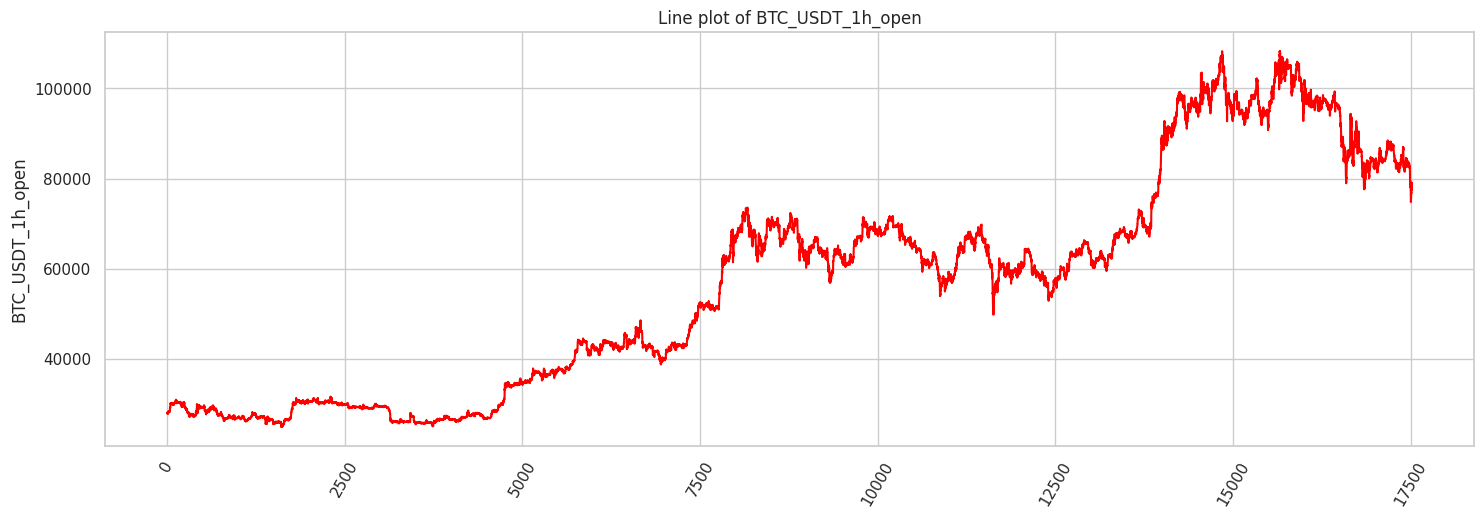

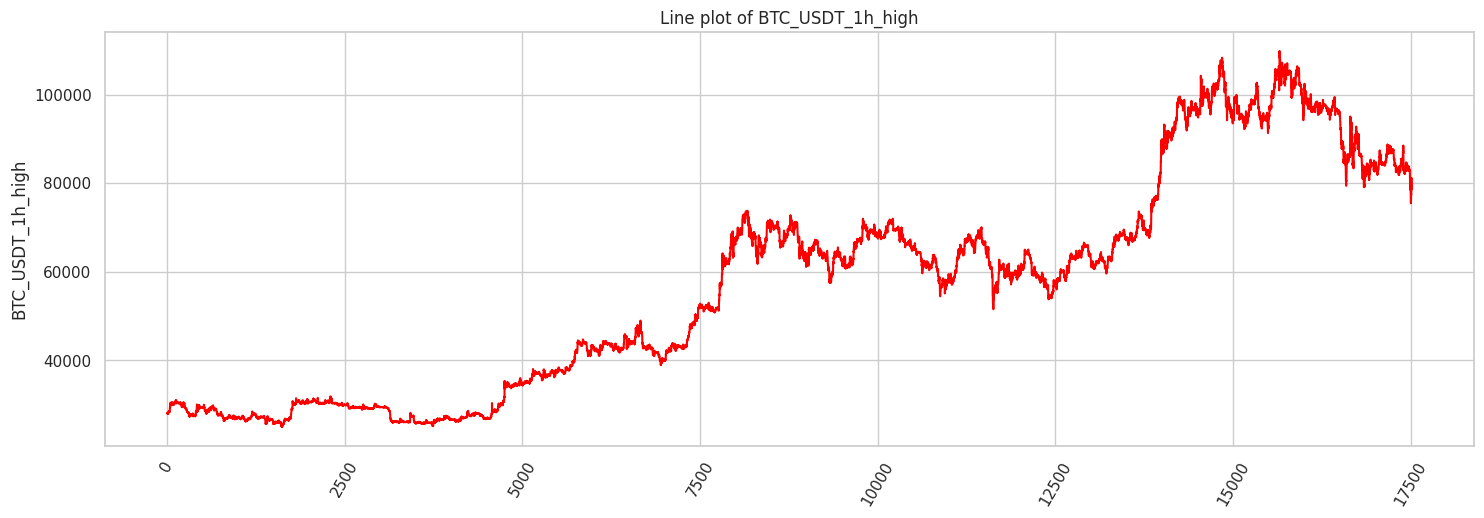

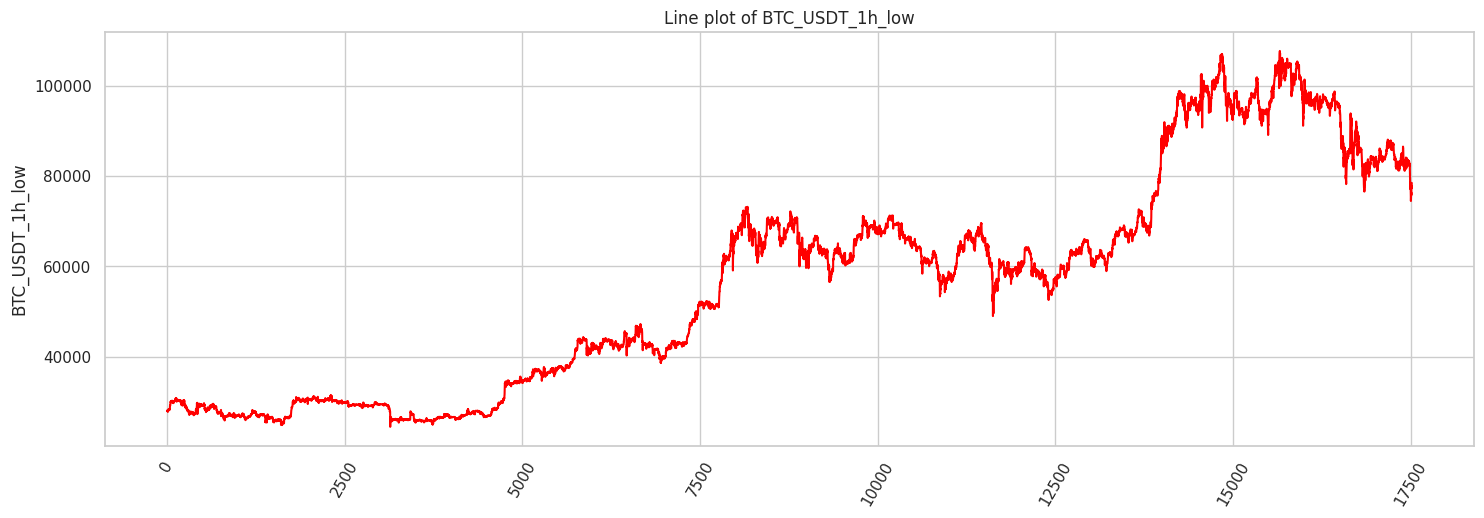

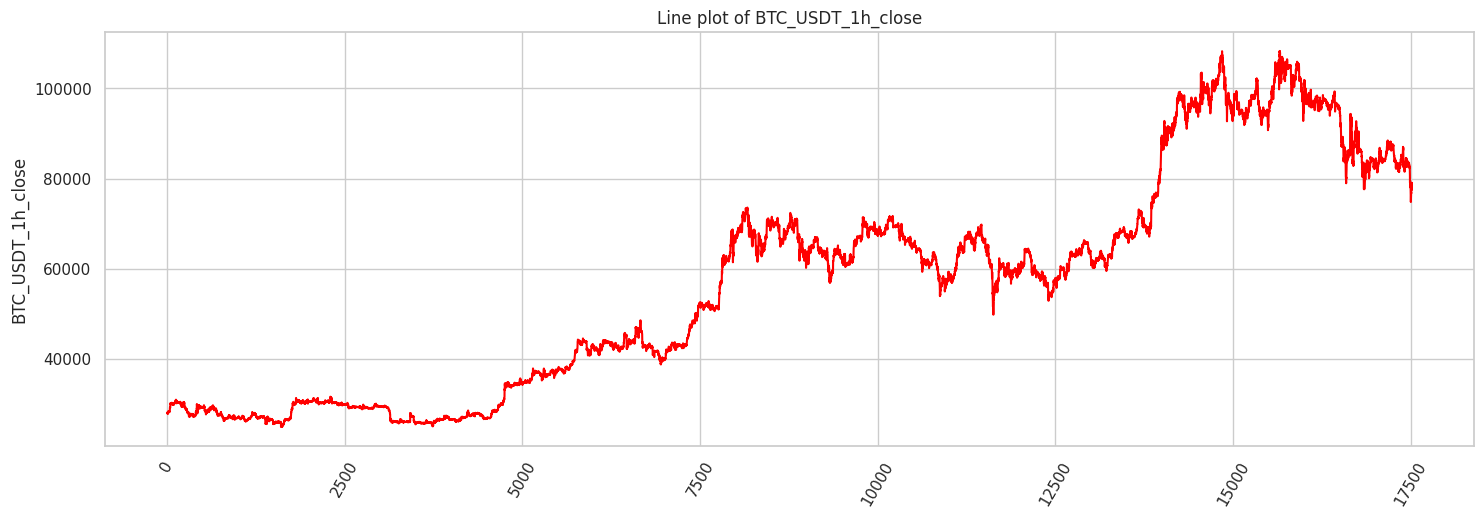

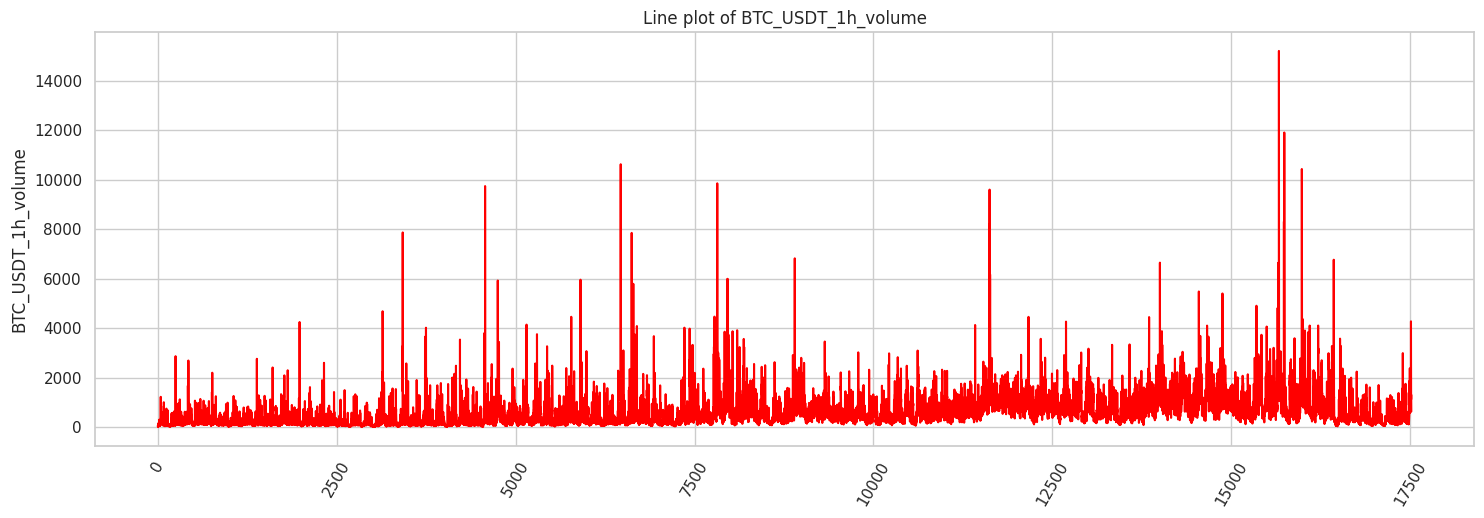

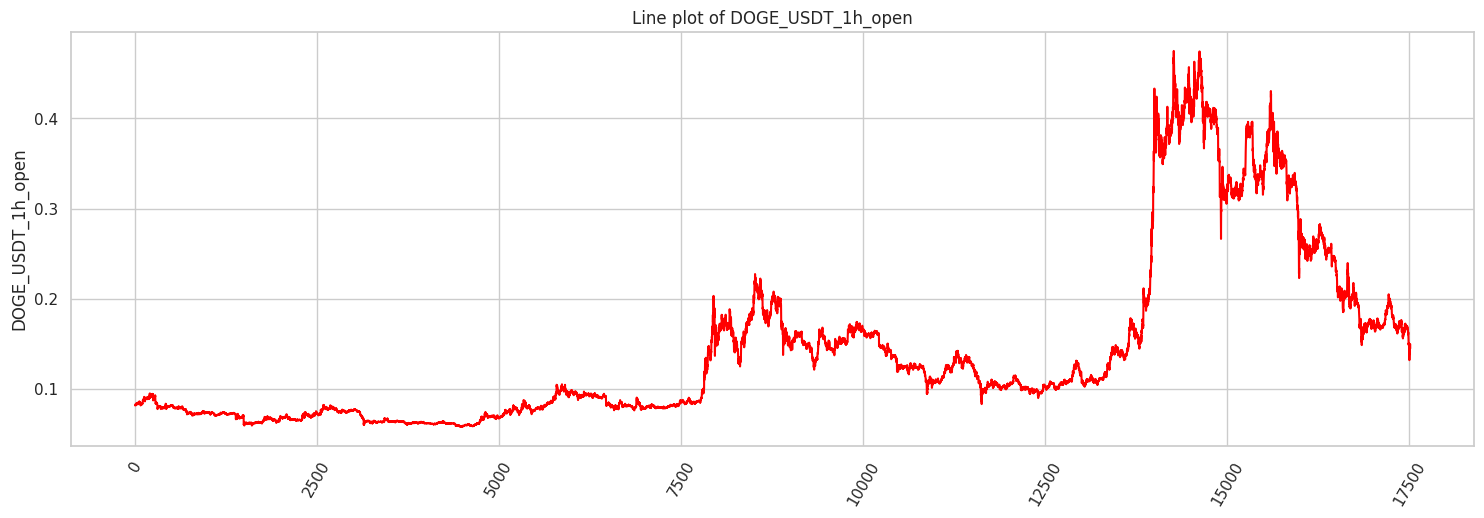

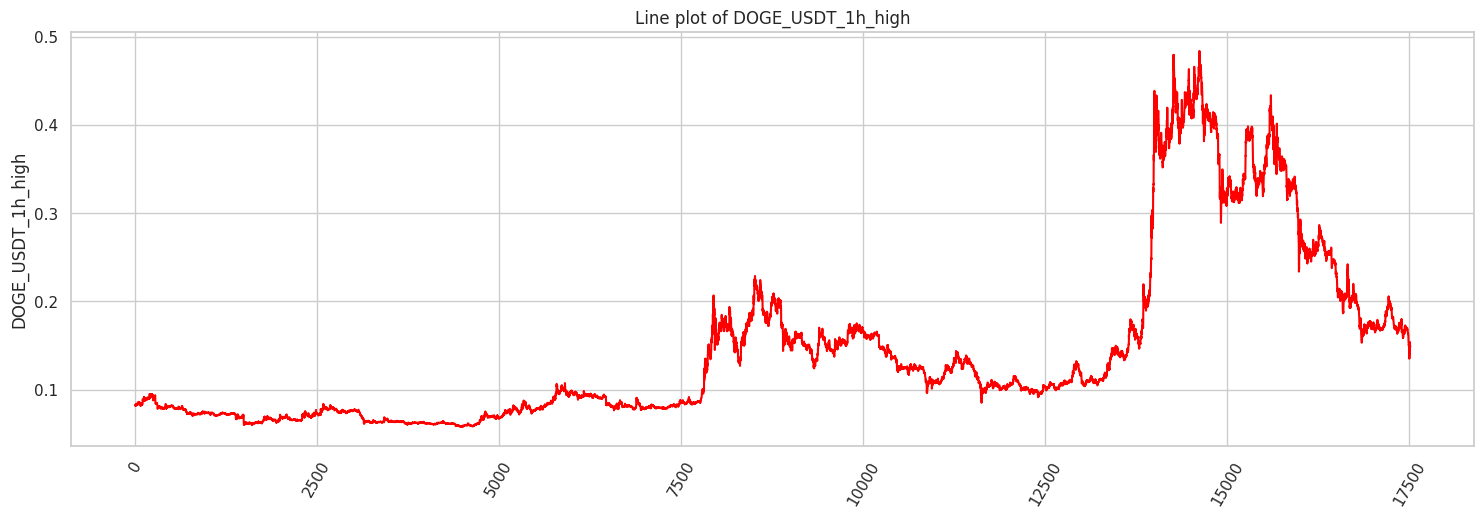

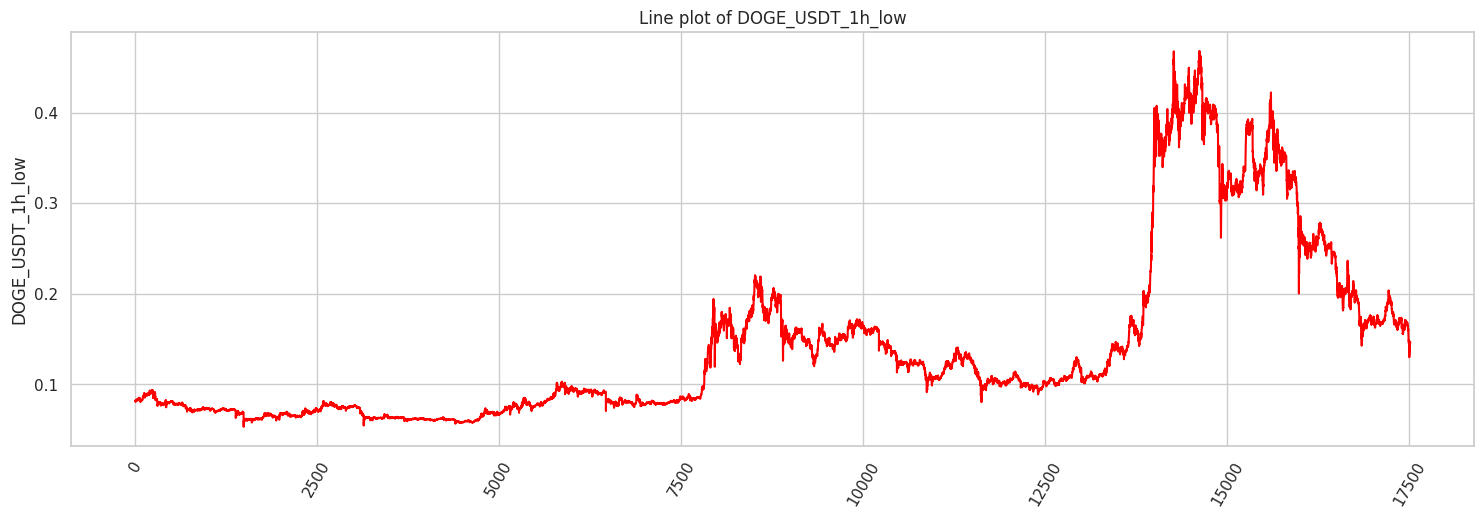

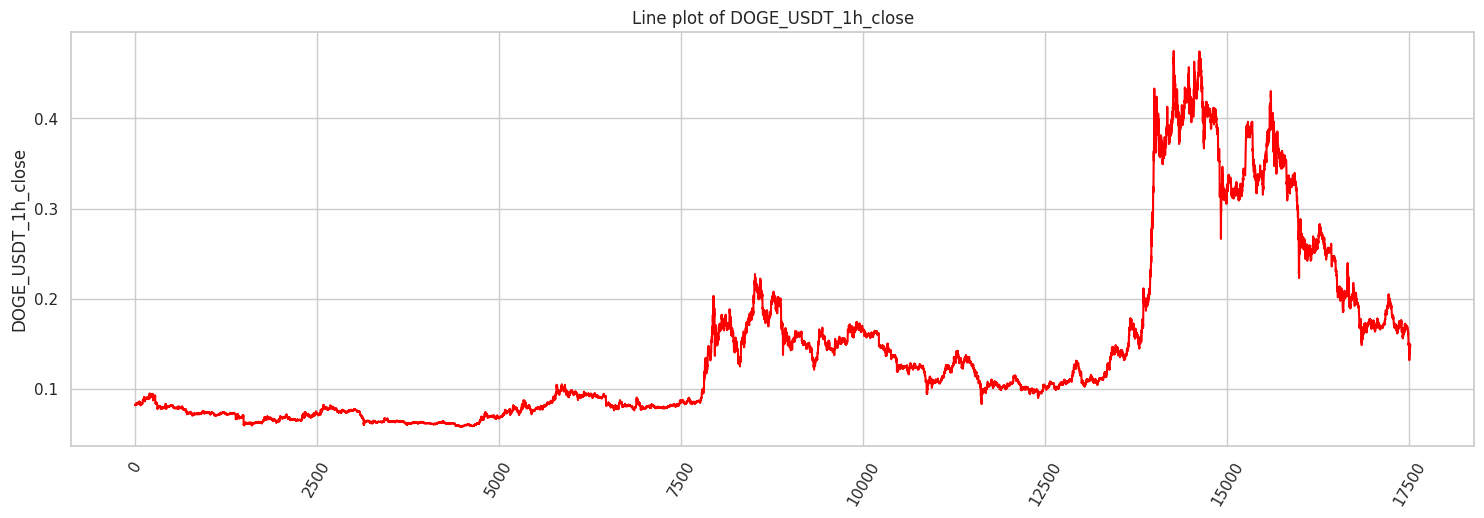

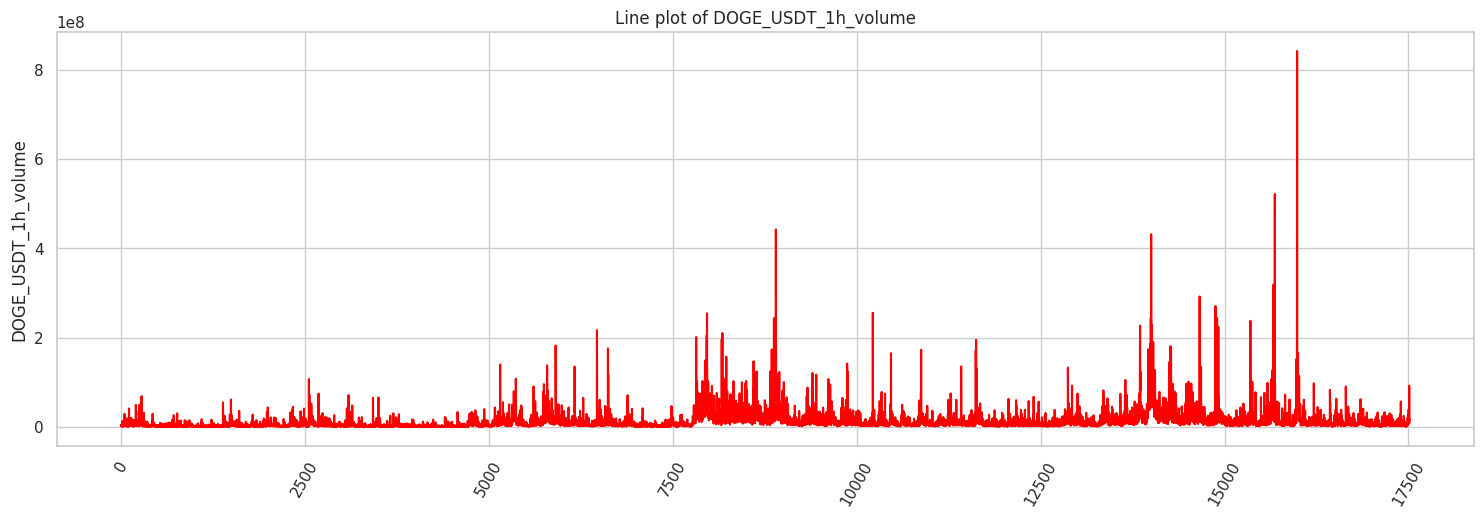

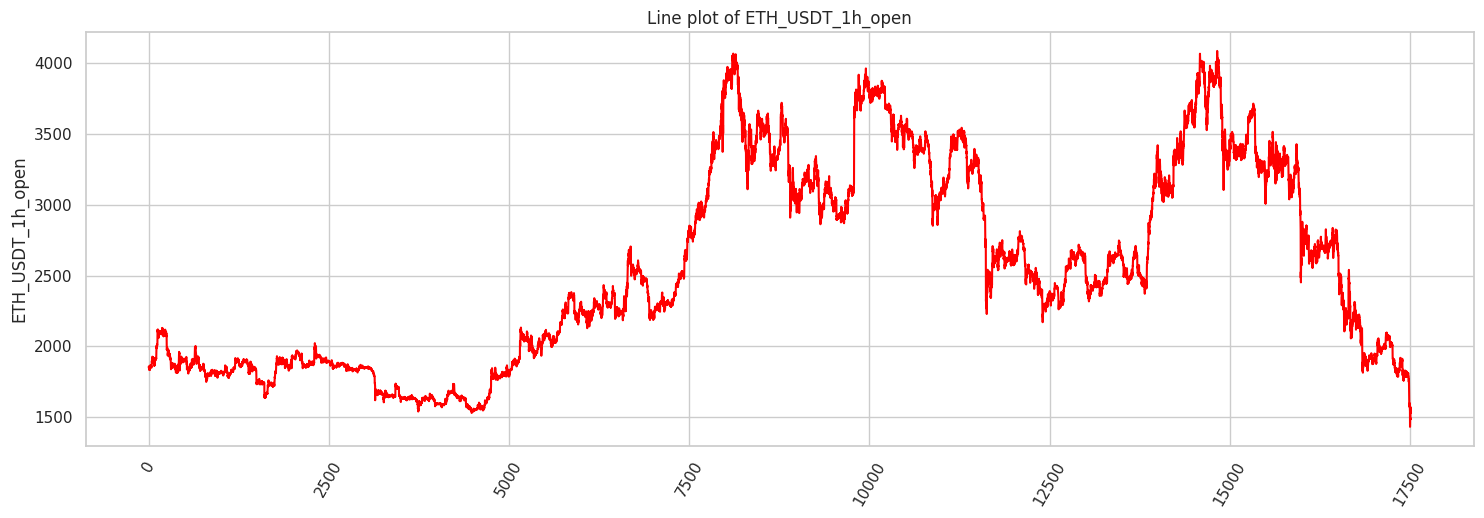

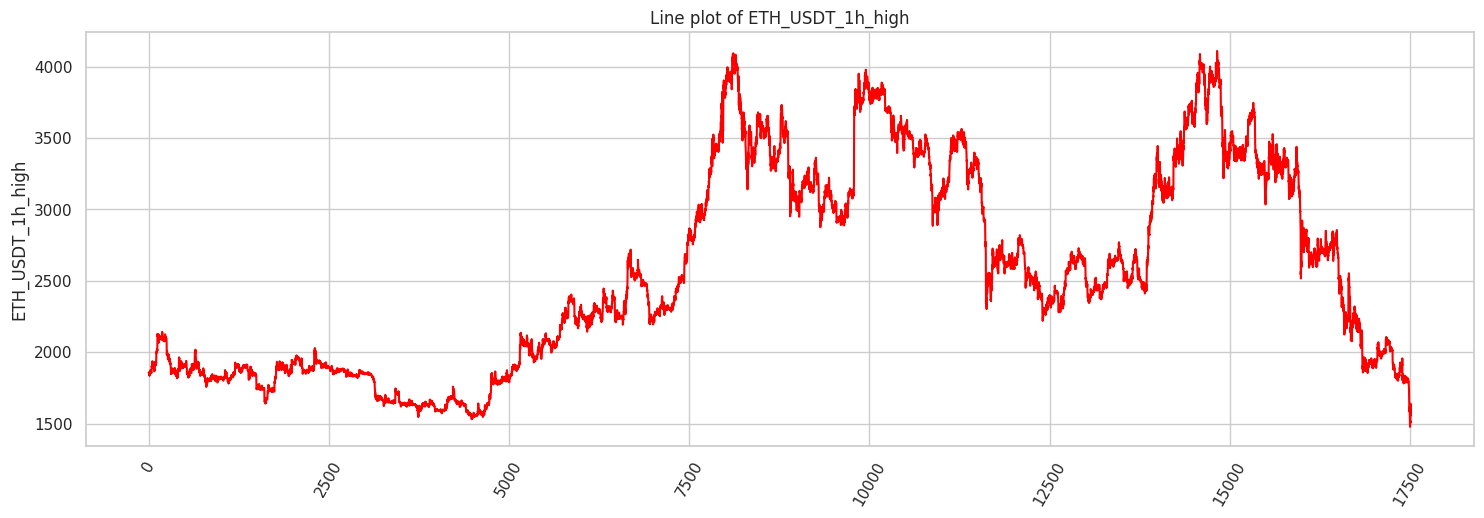

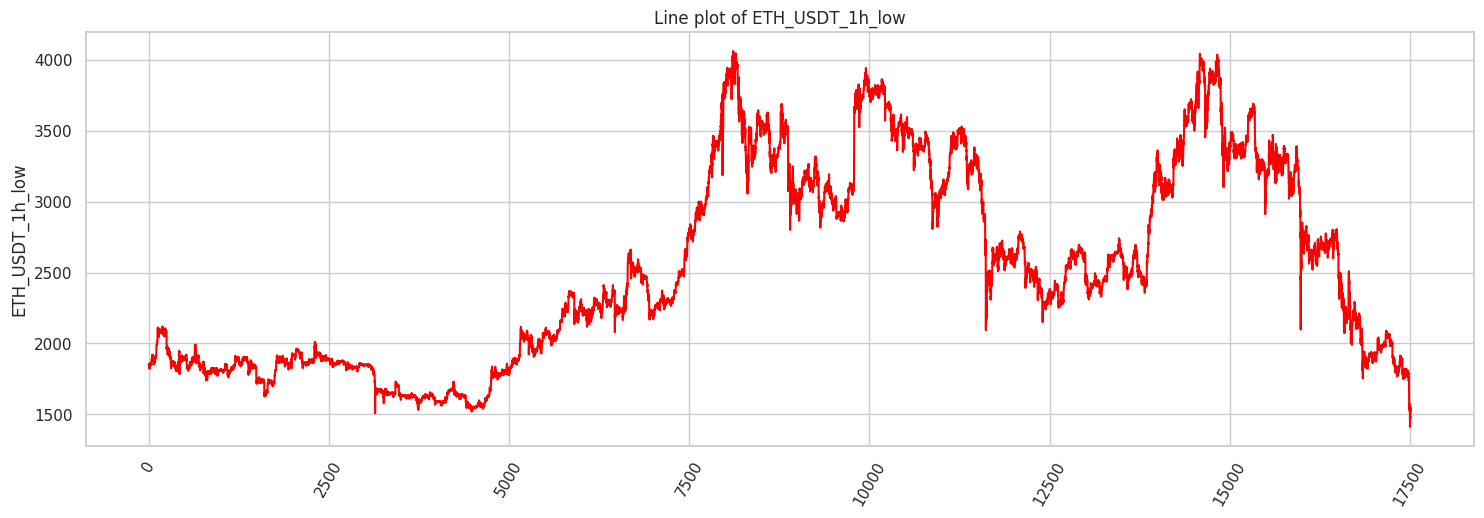

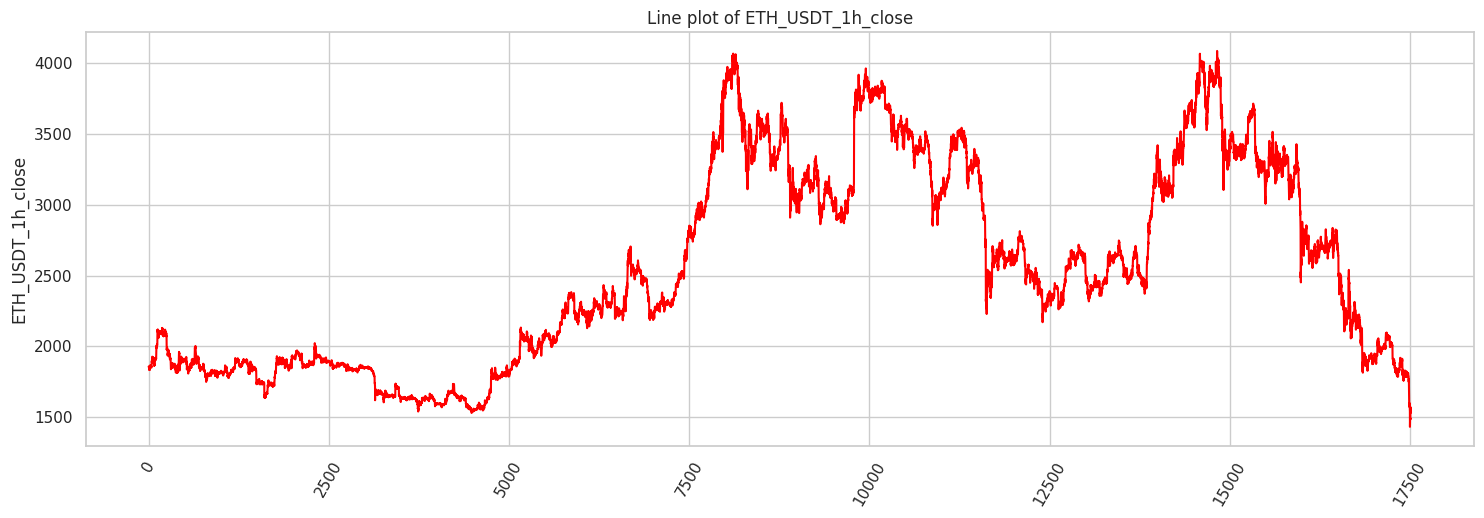

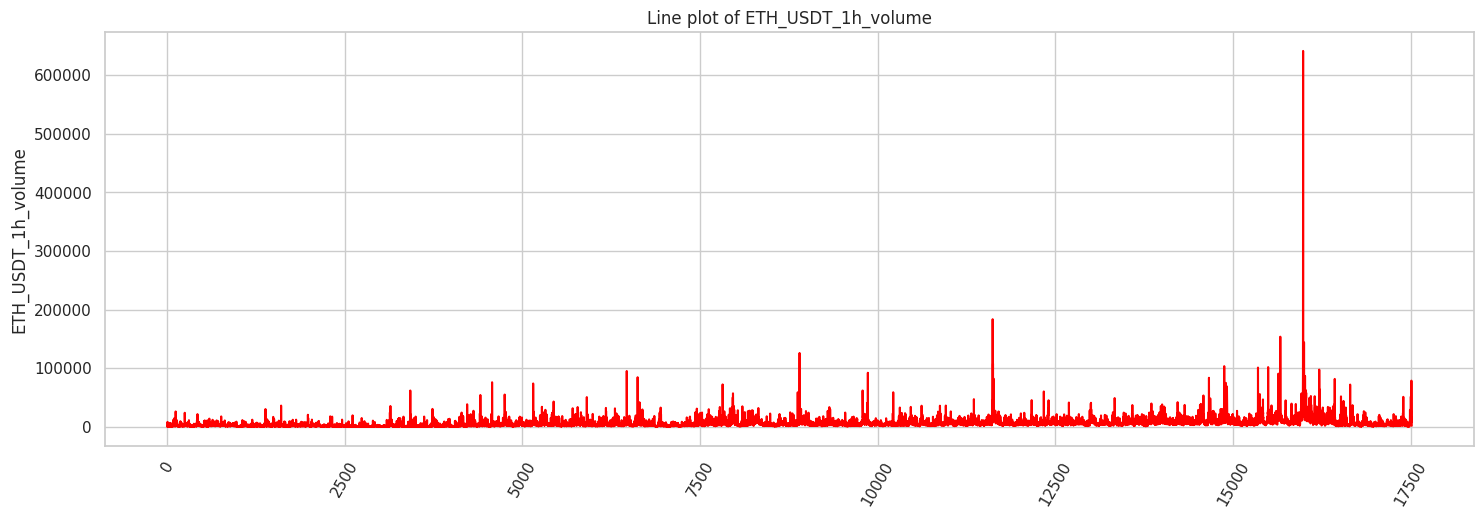

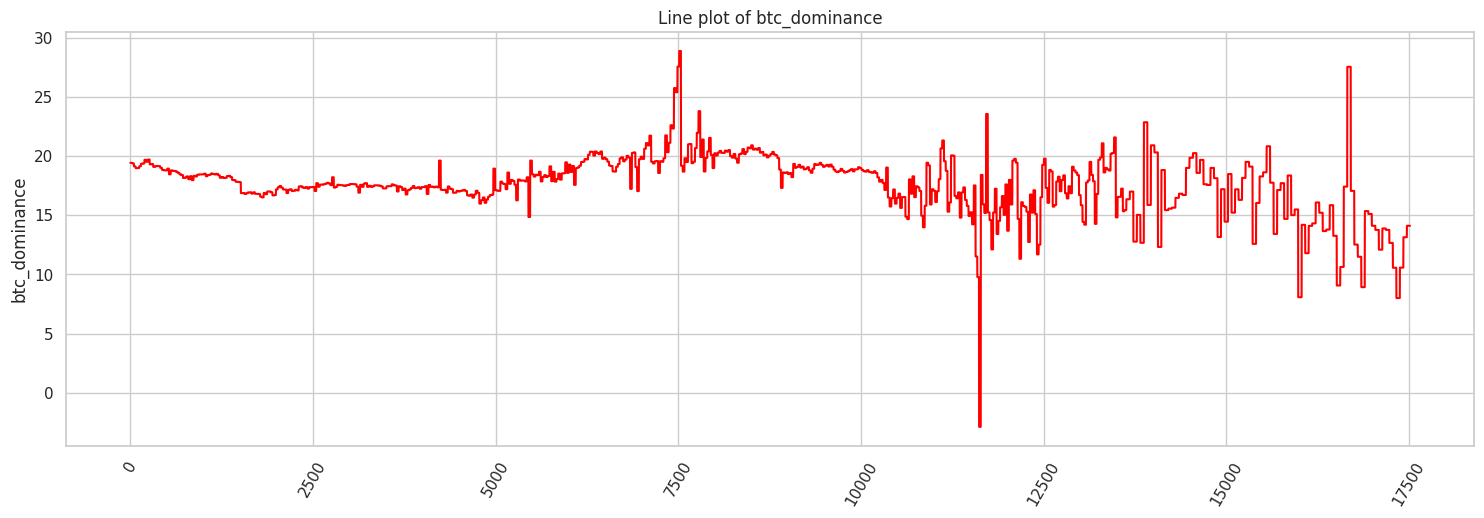

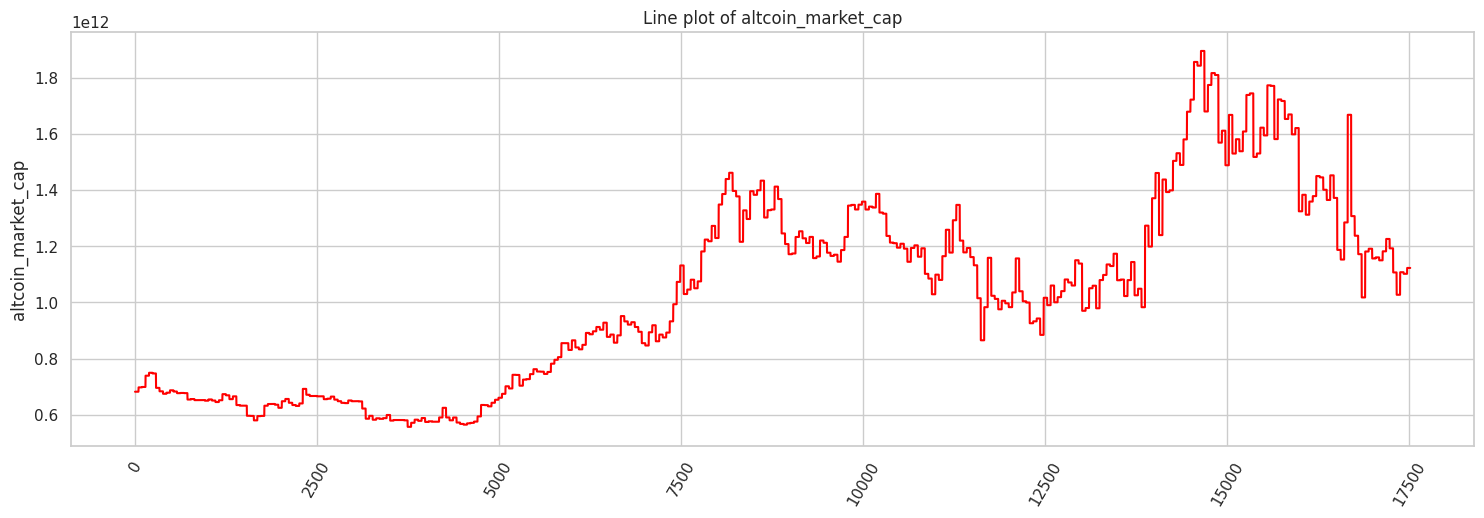

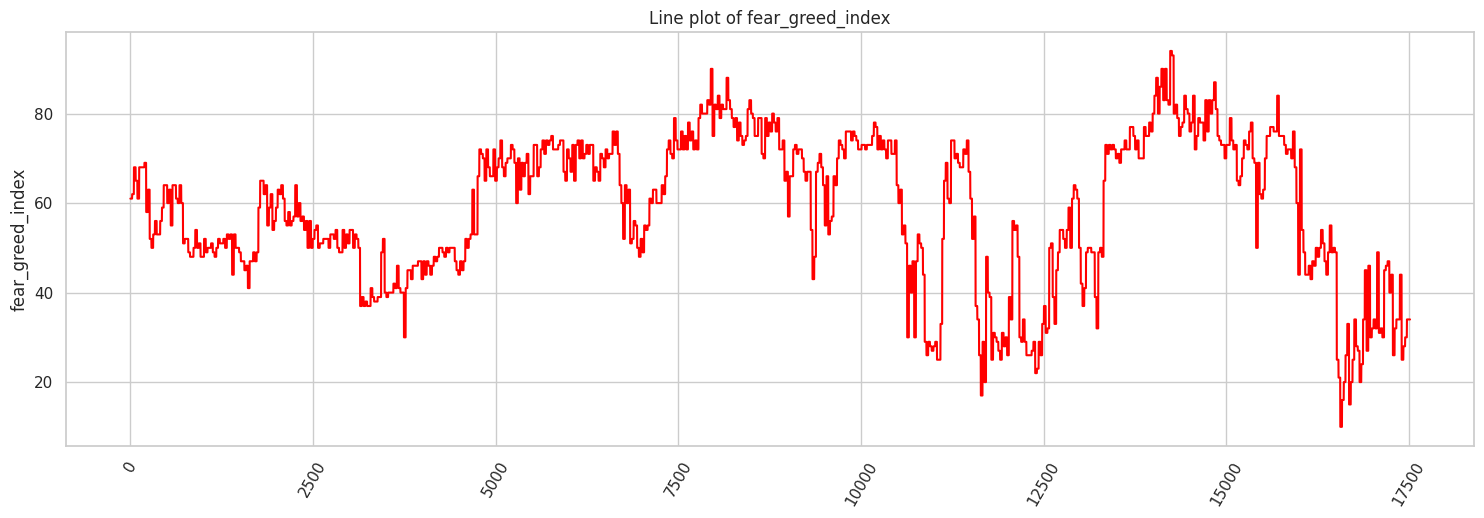

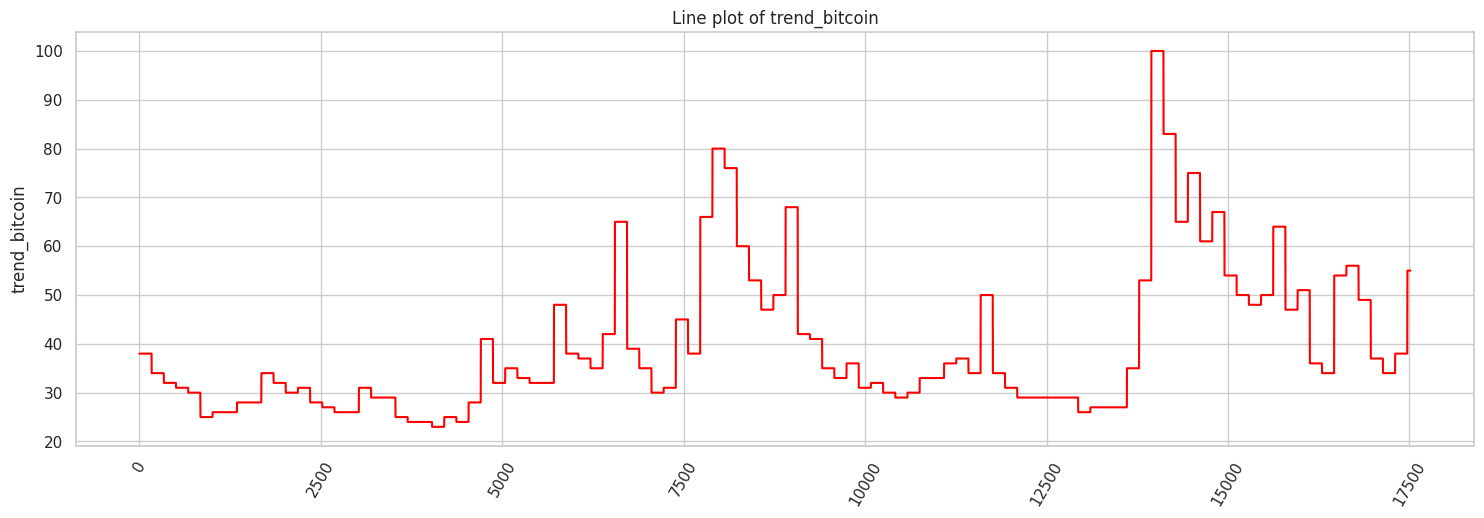

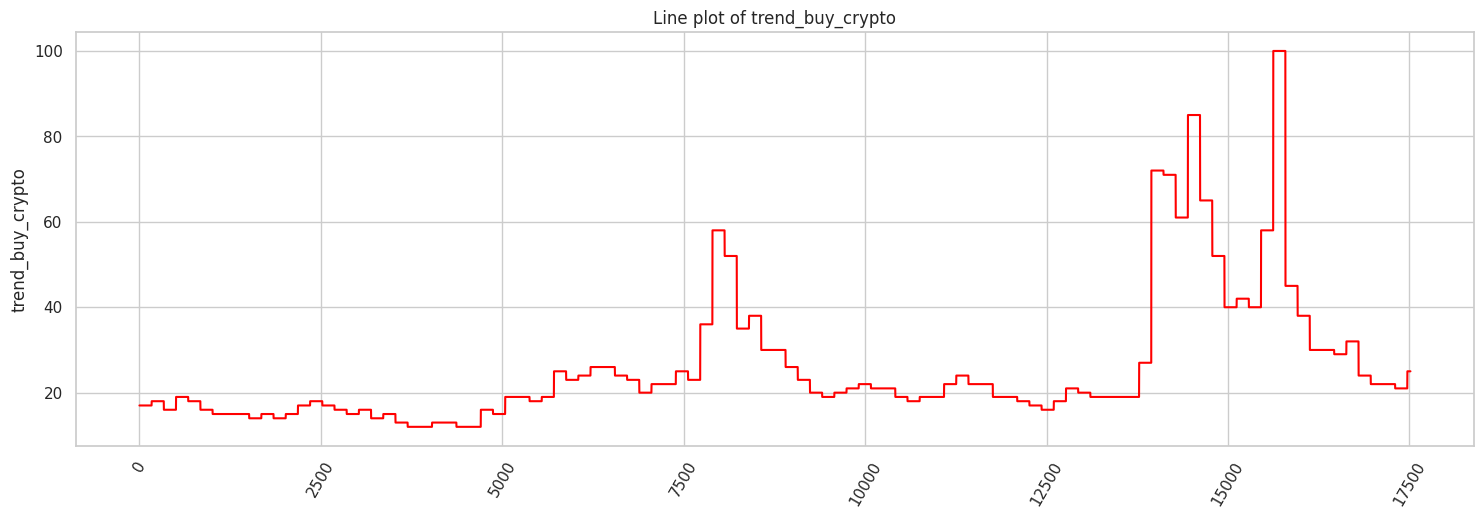

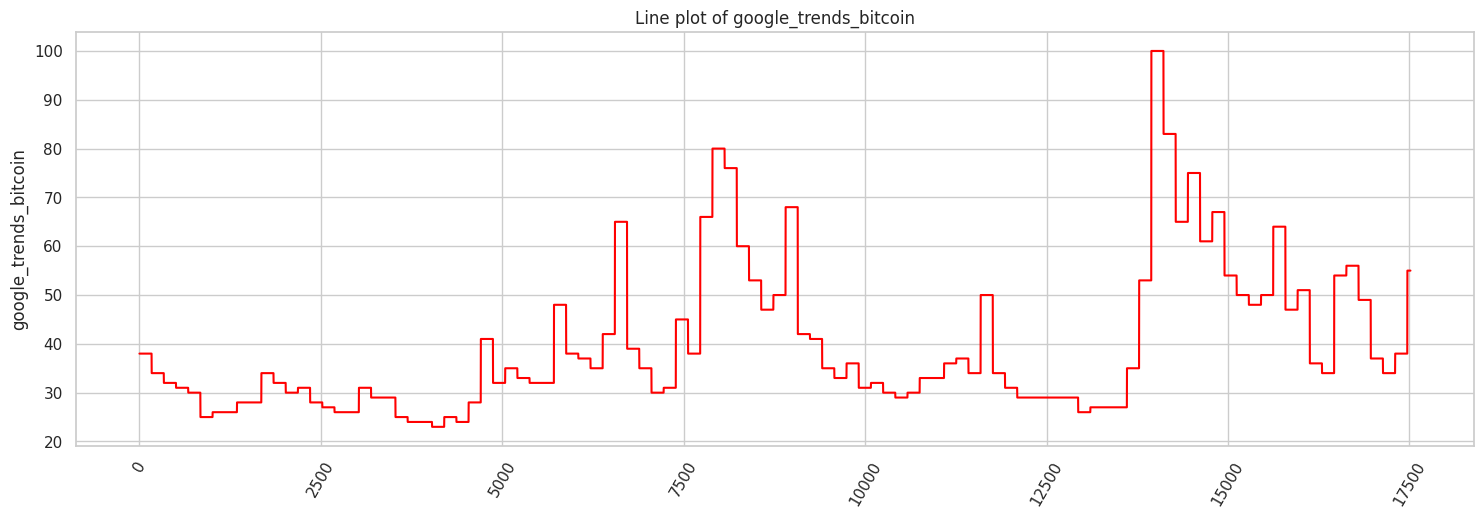

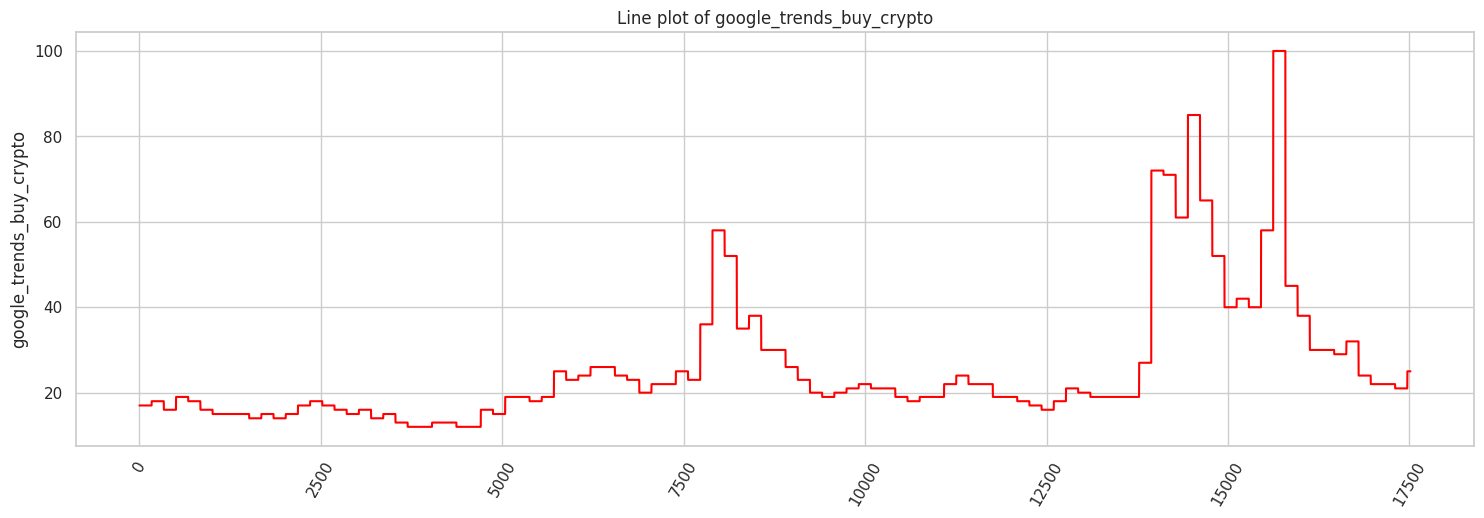

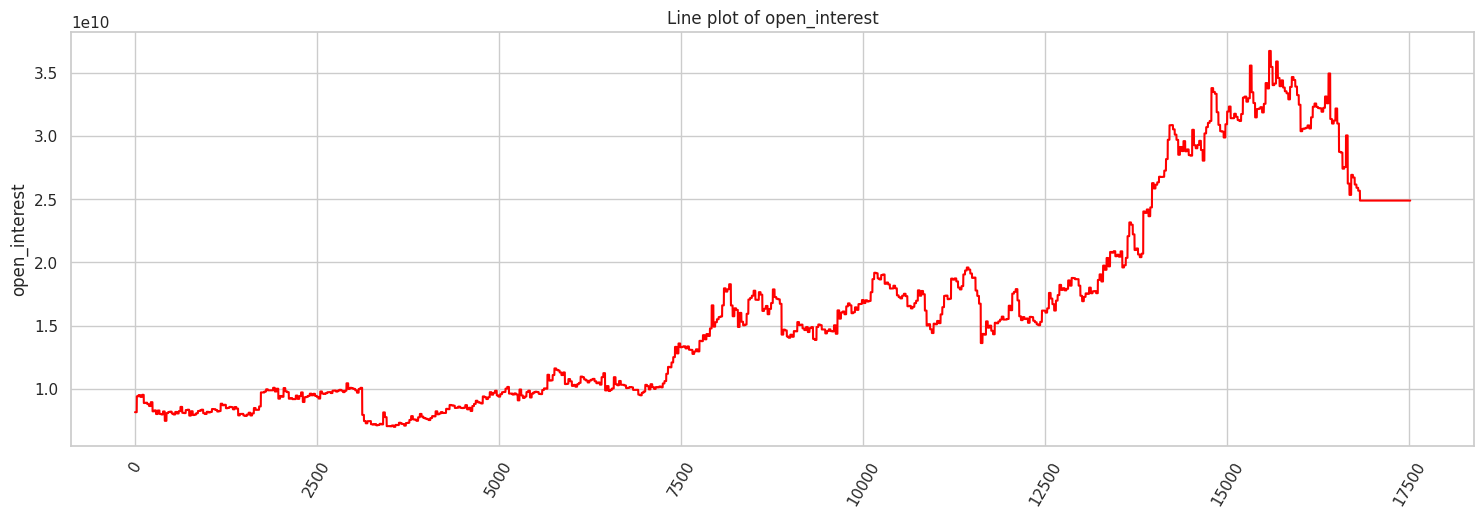

In [13]:
sns.set_style('whitegrid')
sns.set_context("notebook")
for features in cols:
    if features in df.columns:
        plt.figure(figsize=(15,5))
        sns.lineplot(df[features].dropna(),color='red')
        plt.title(f'Line plot of {features}')
        plt.tight_layout()
        plt.xticks(rotation=60)
        plt.show()

# Histogram Plot

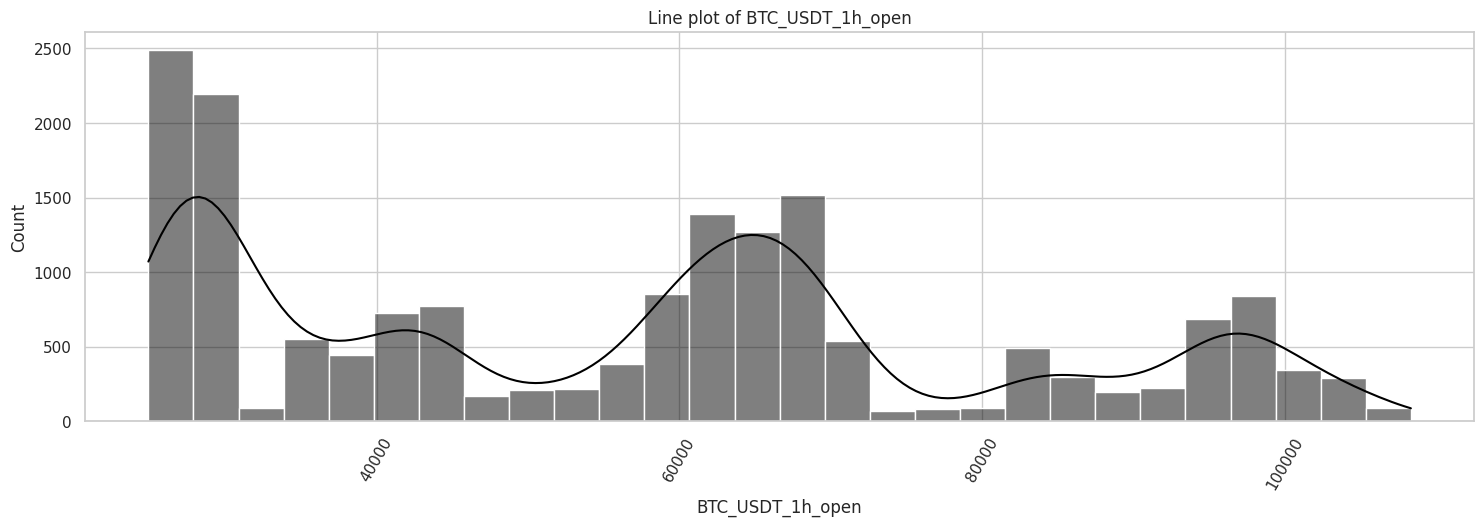

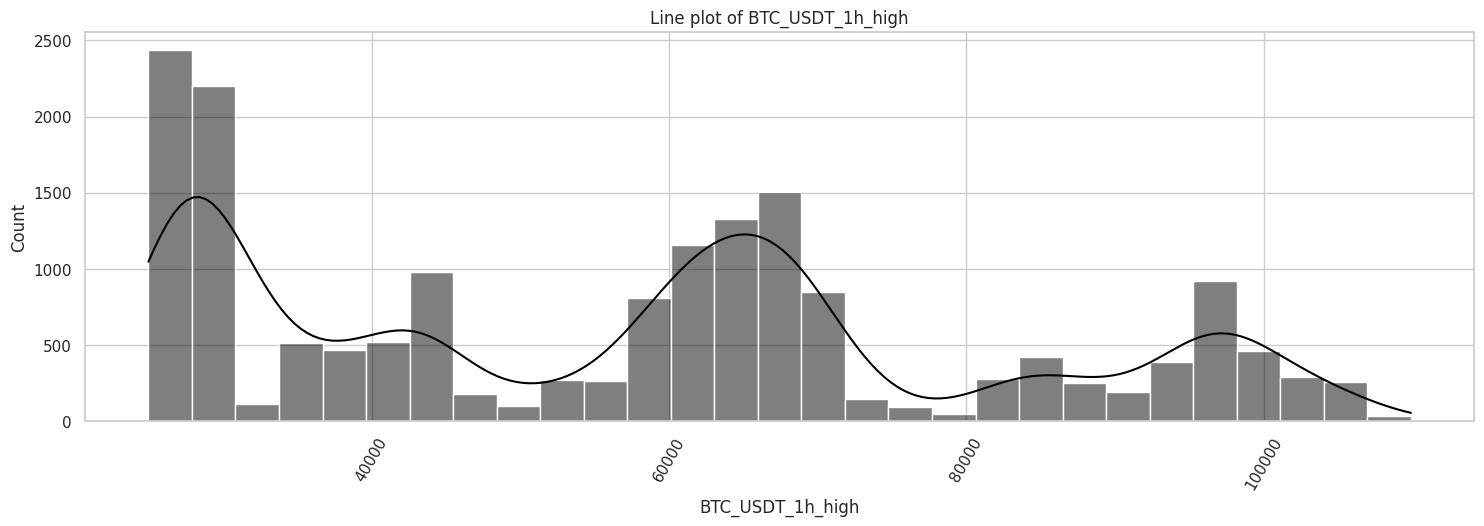

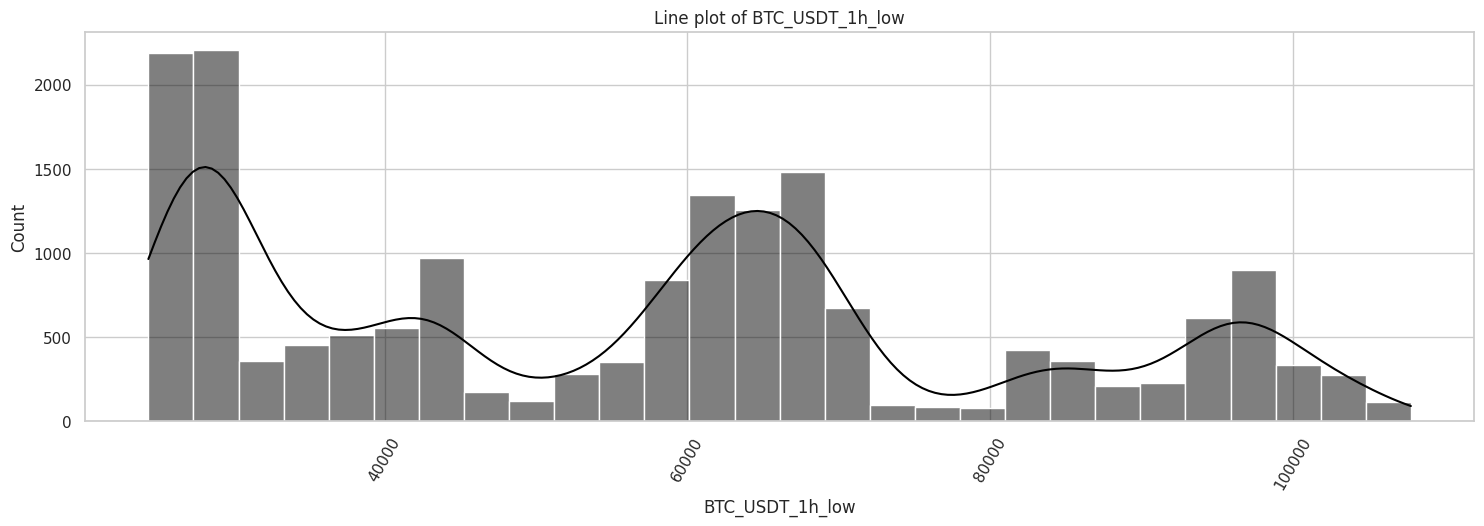

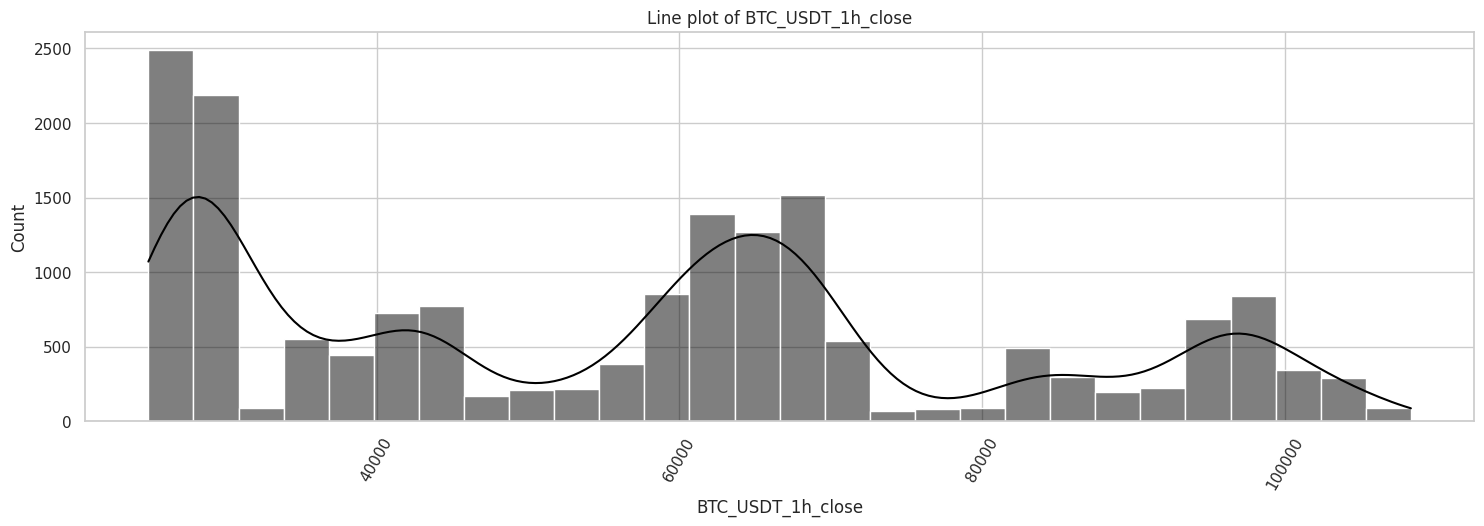

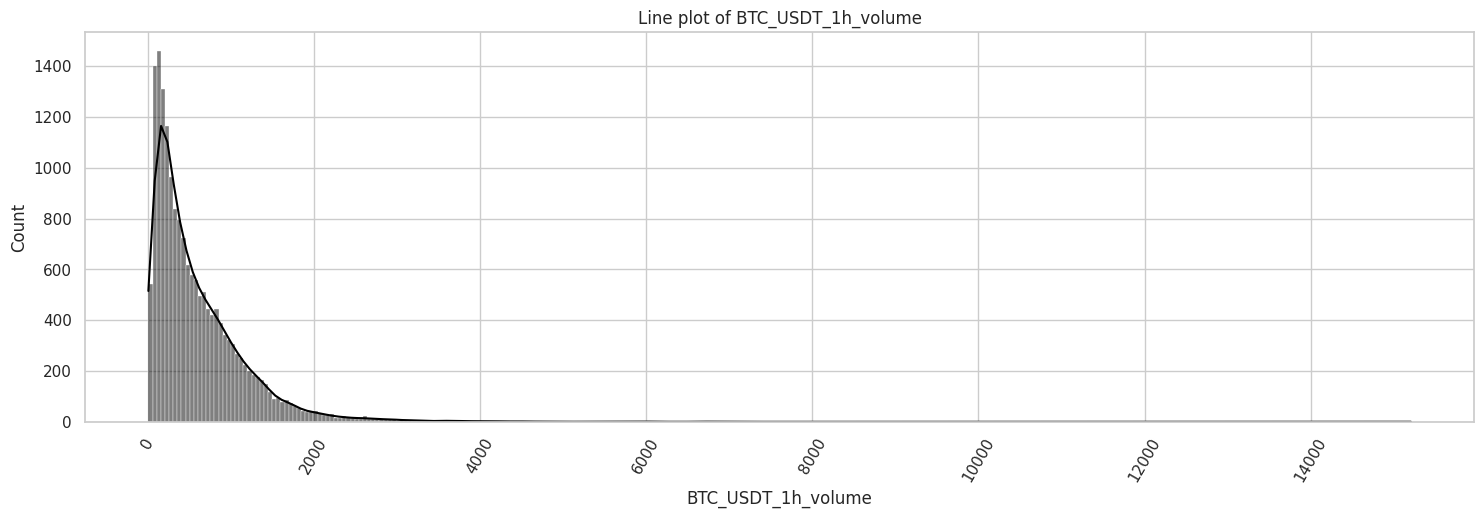

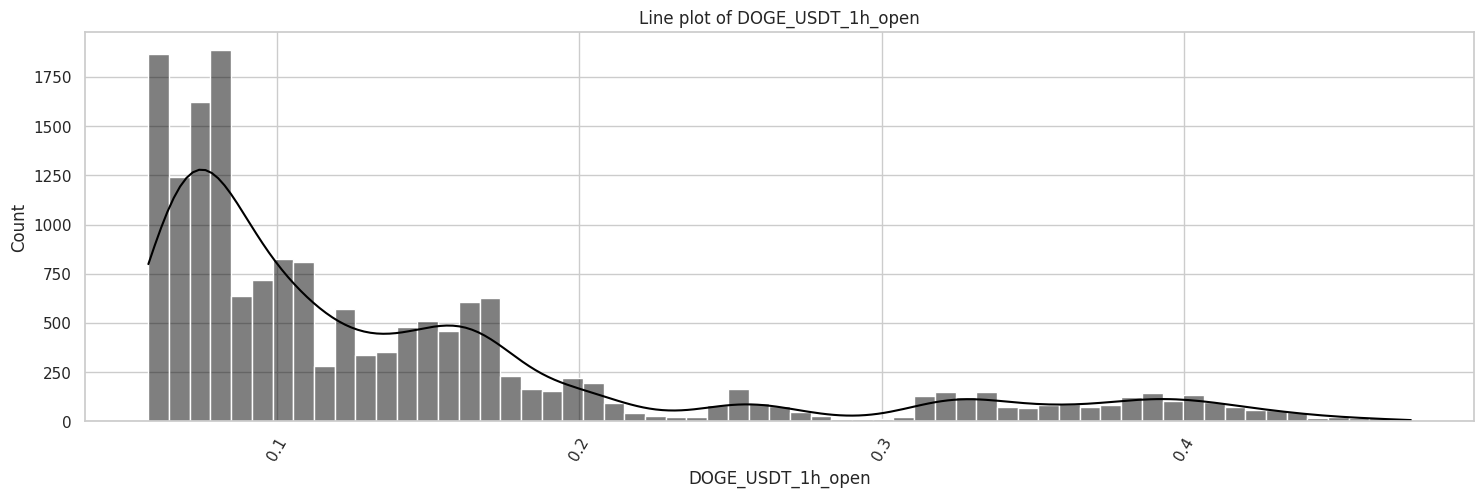

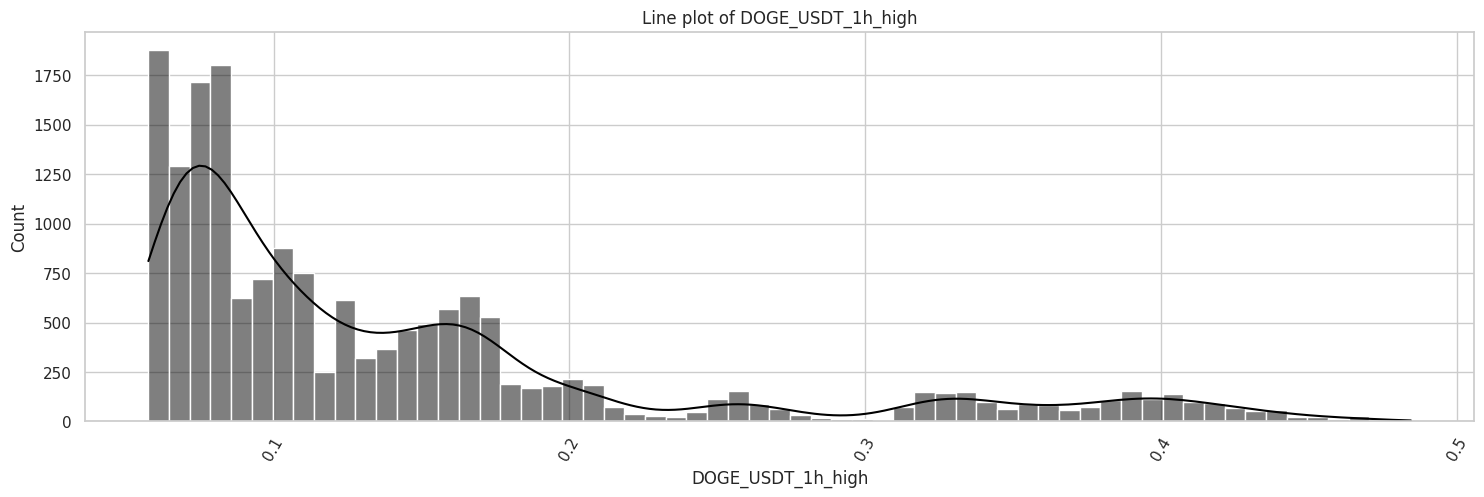

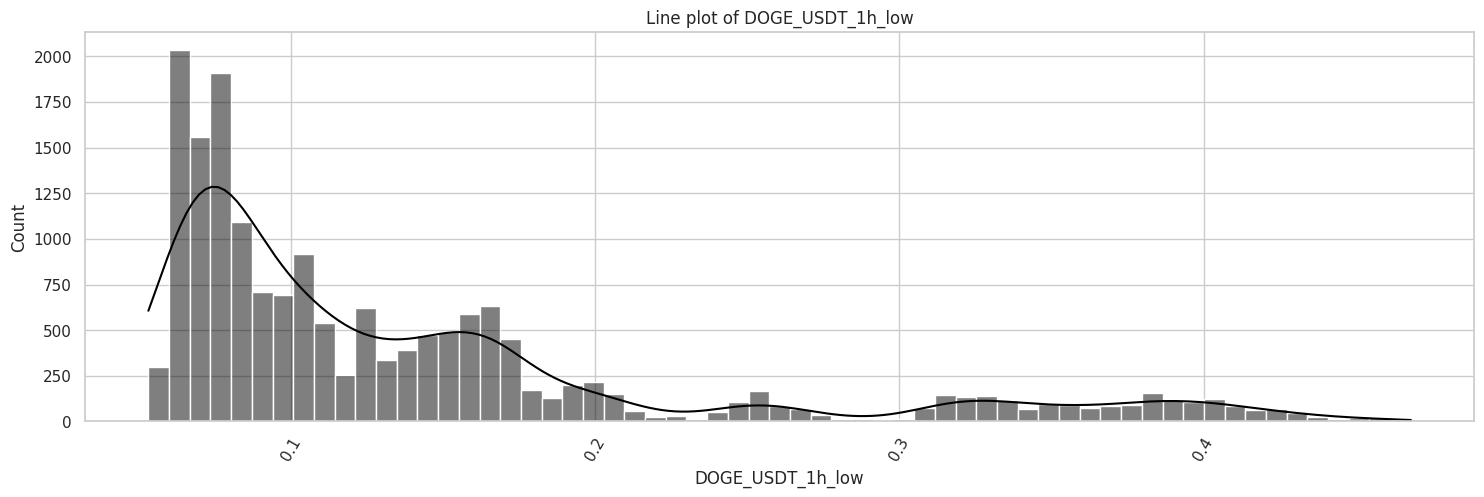

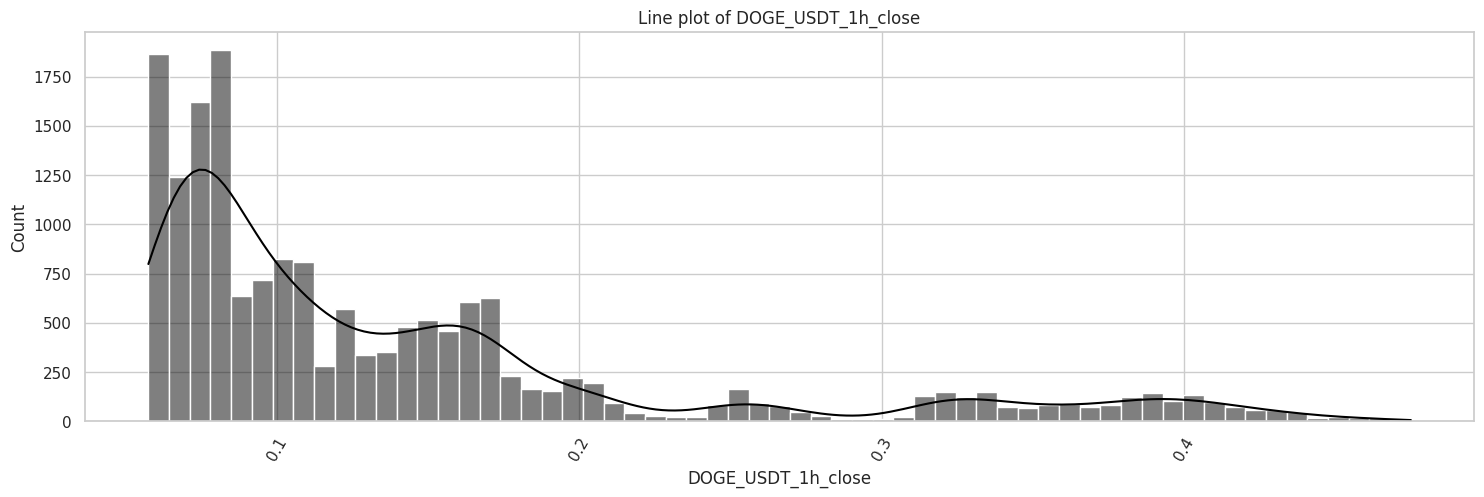

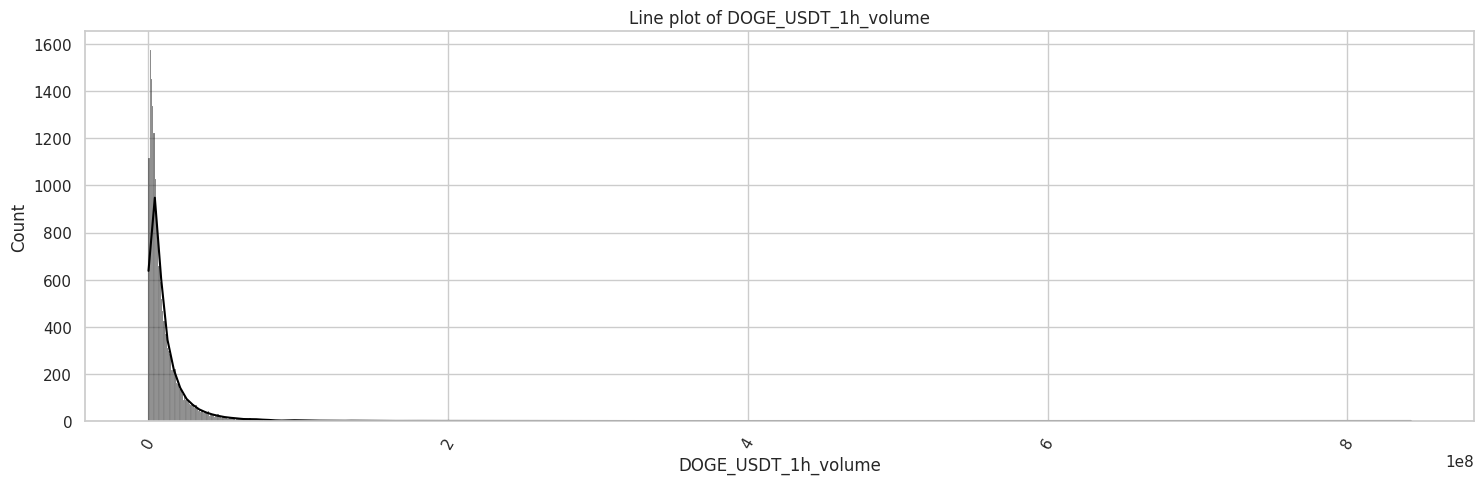

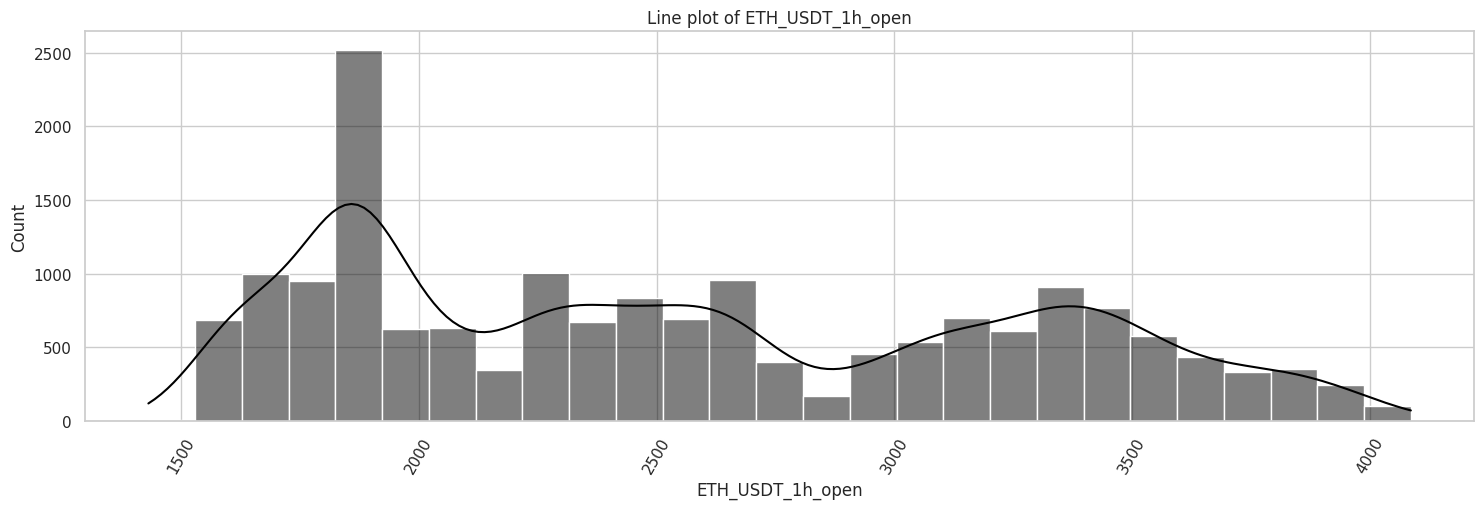

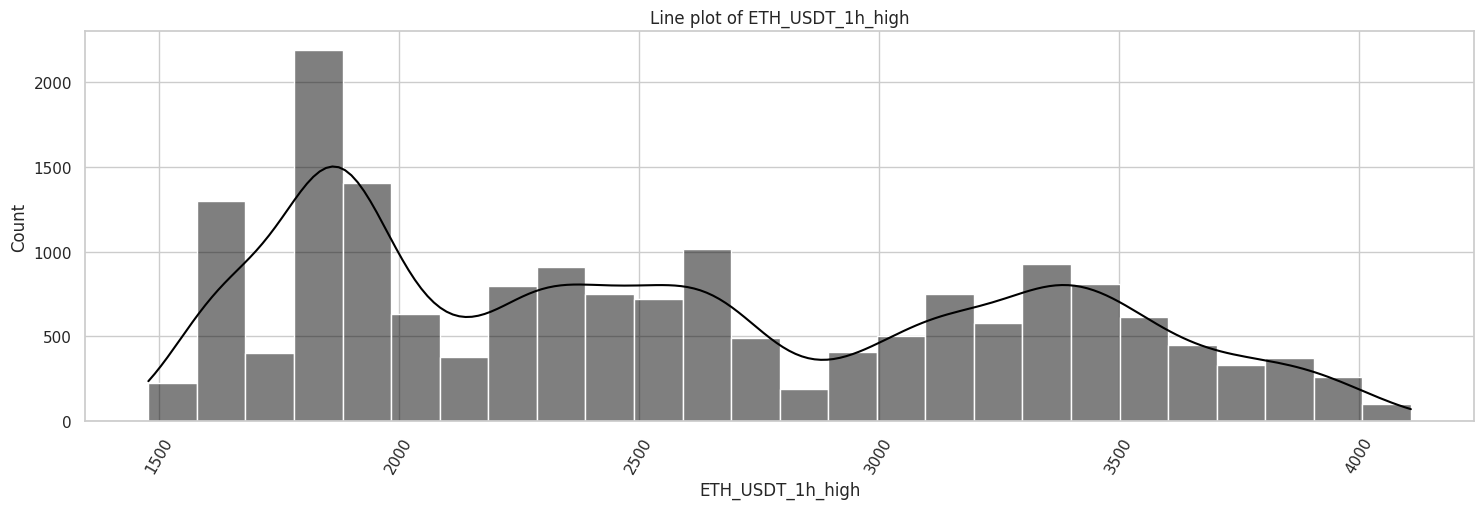

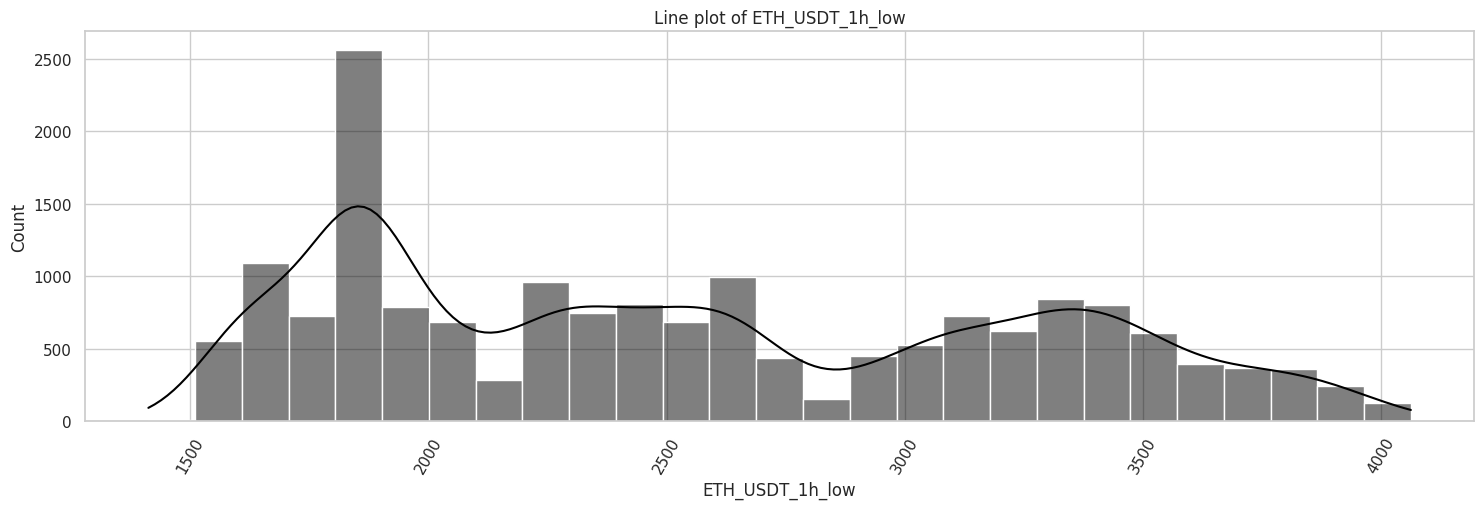

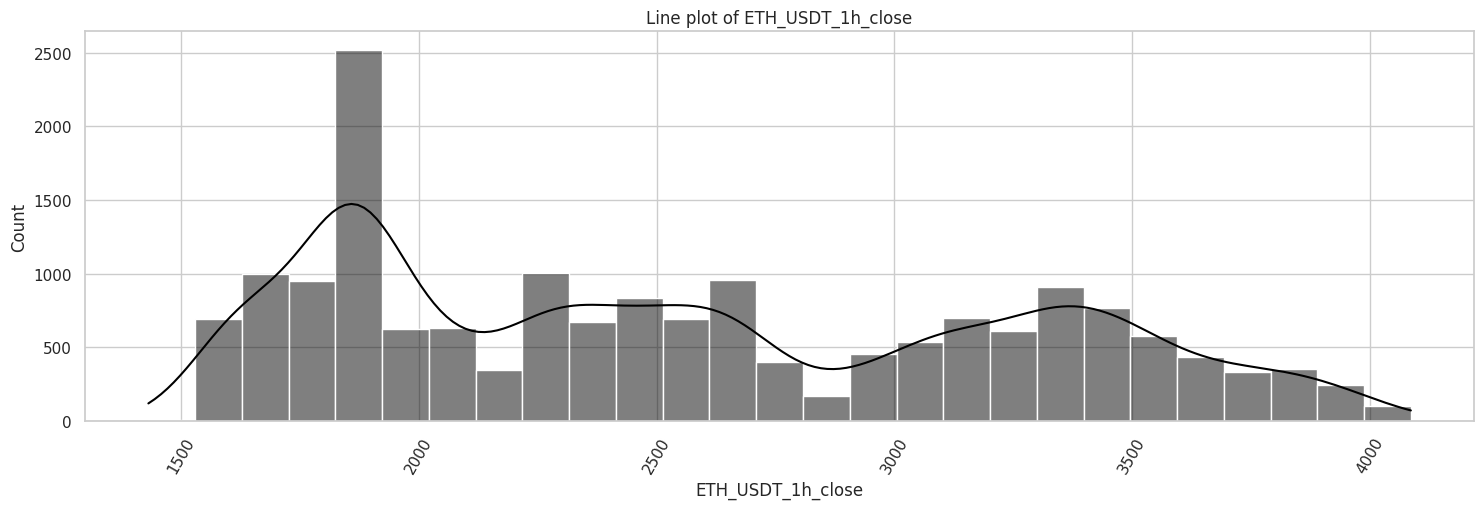

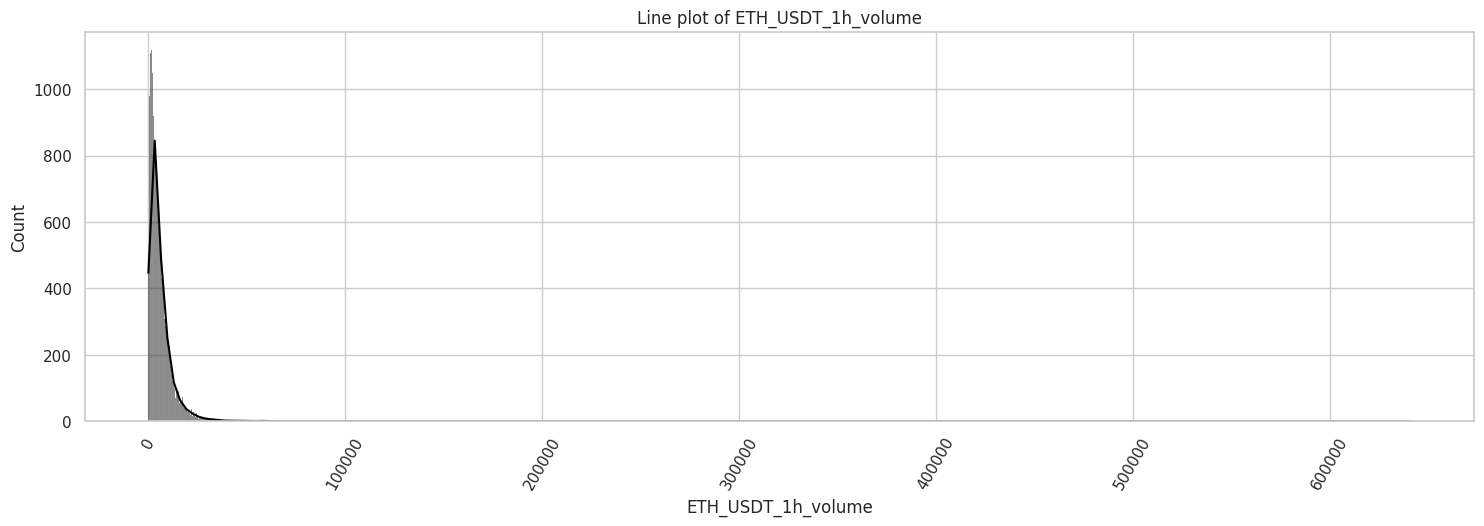

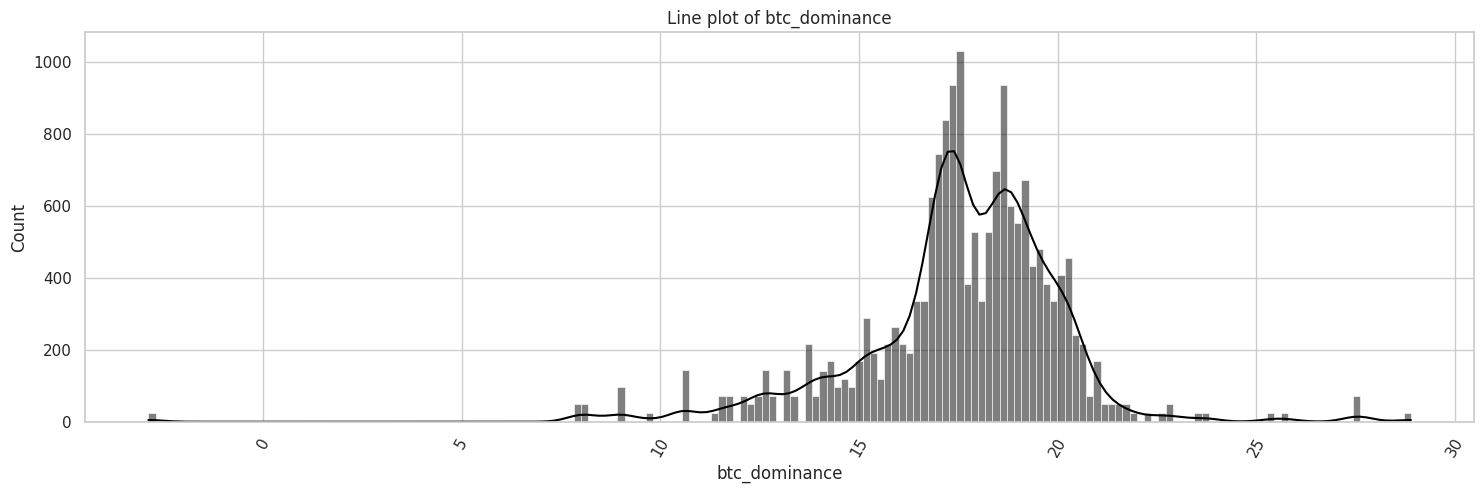

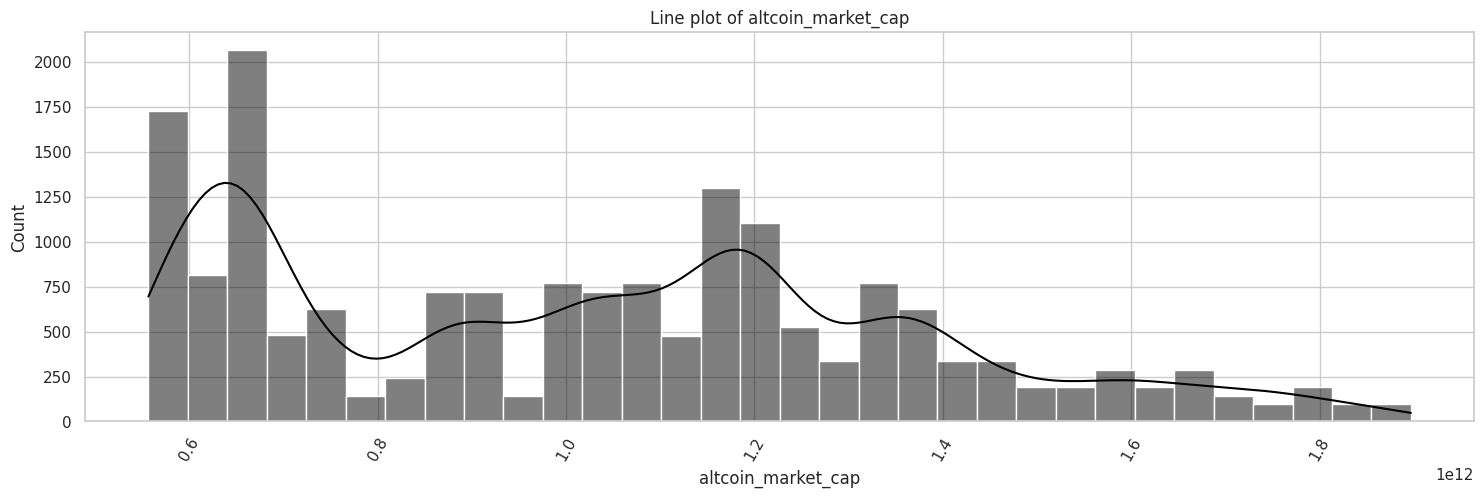

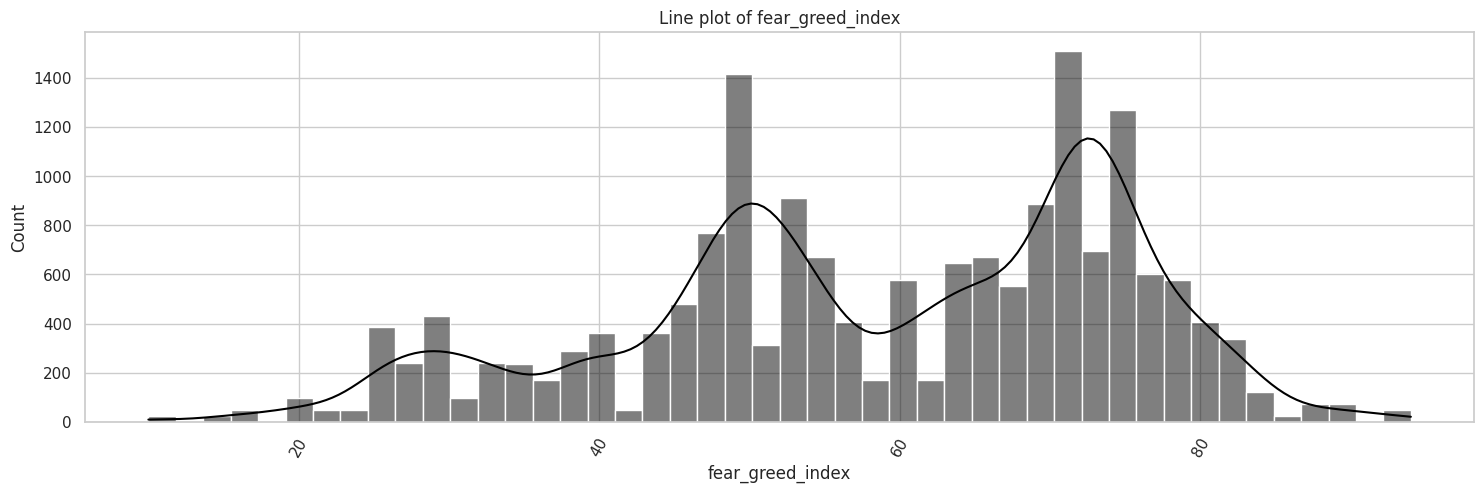

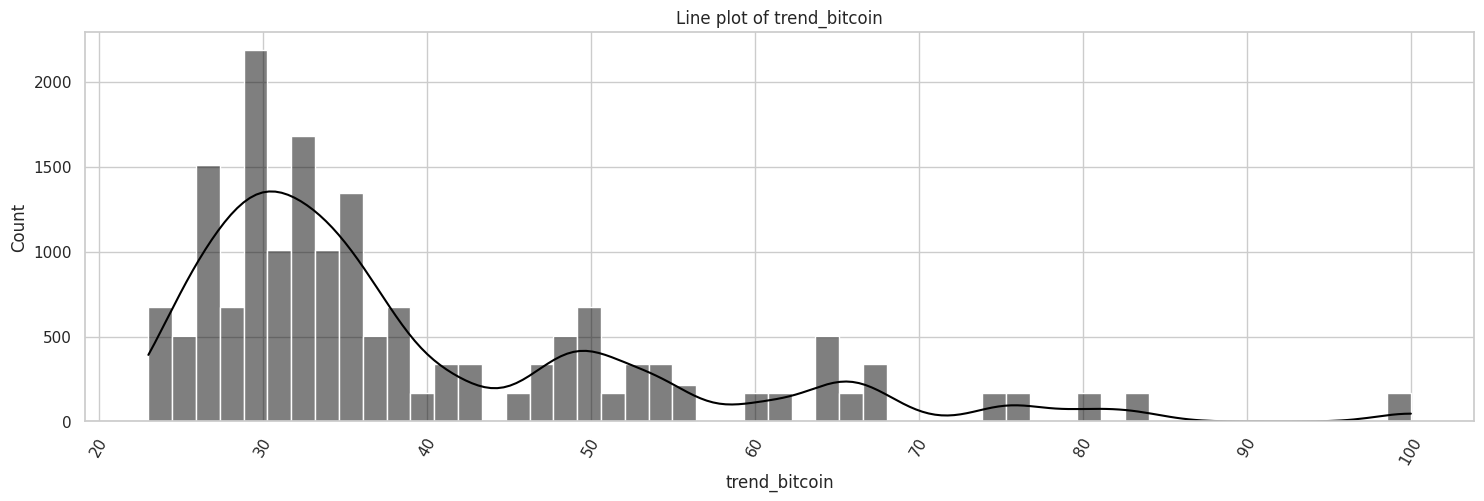

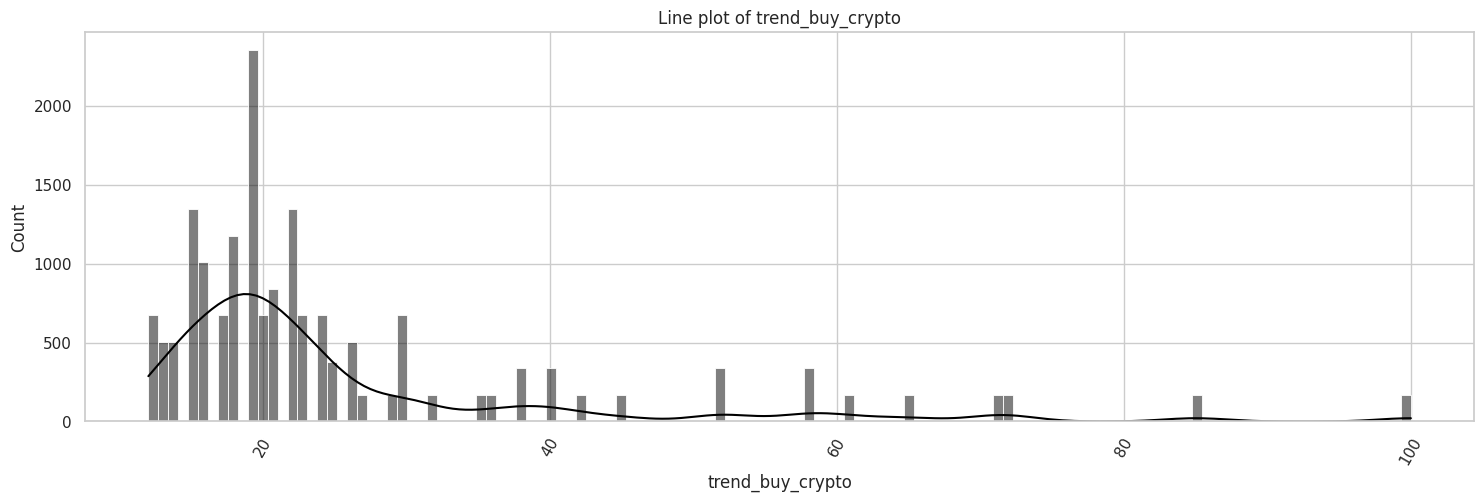

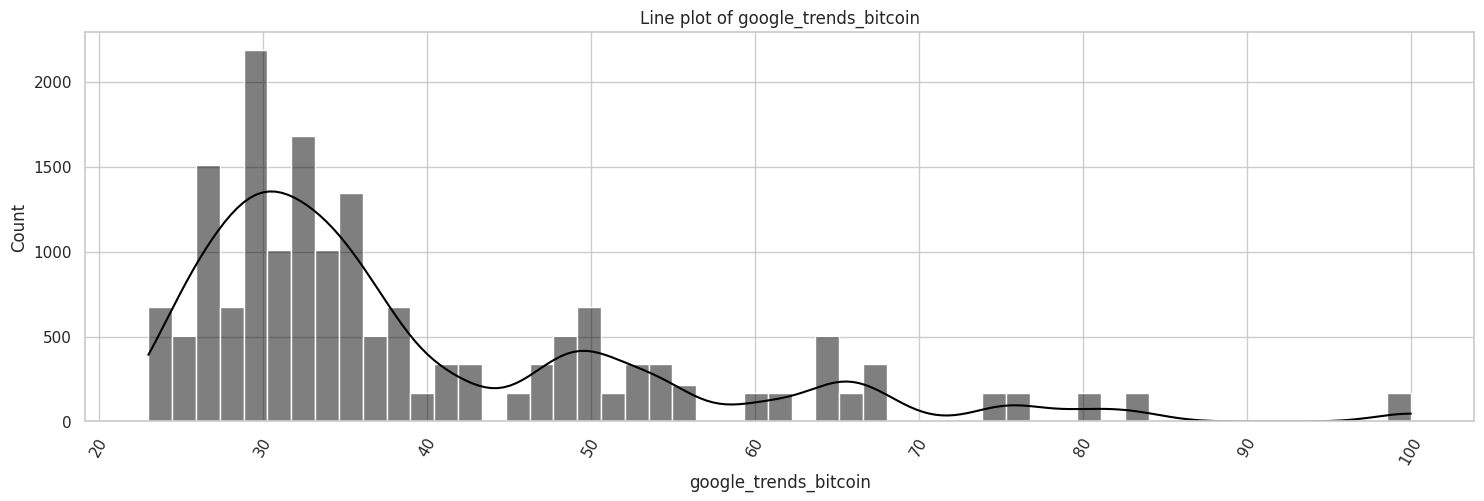

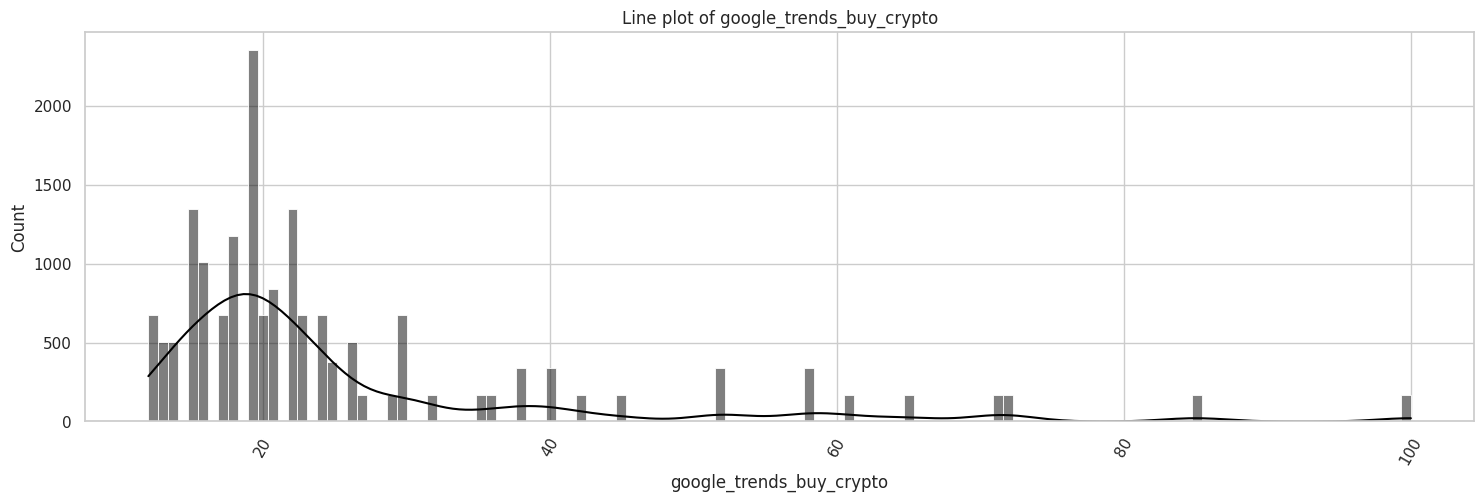

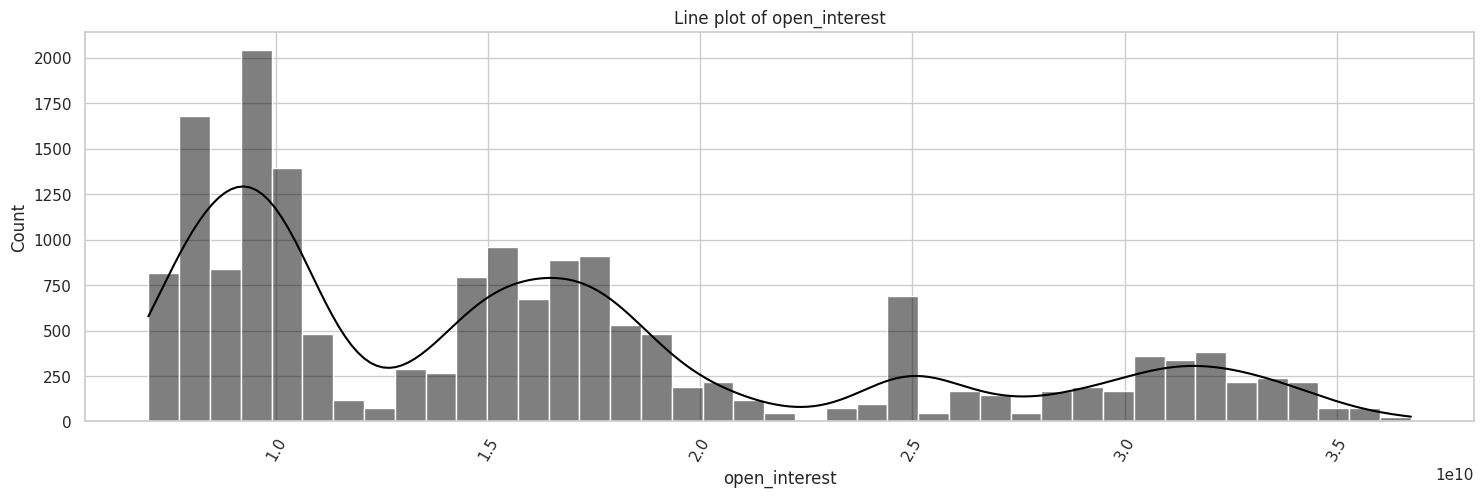

In [14]:
for features in cols:
    if features in df.columns:
        plt.figure(figsize=(15,5))
        sns.histplot(df[features].dropna(),color='black',kde=True)
        plt.title(f'Line plot of {features}')
        plt.tight_layout()
        plt.xticks(rotation=60)
        plt.show()

# Correlation Matrix Plot

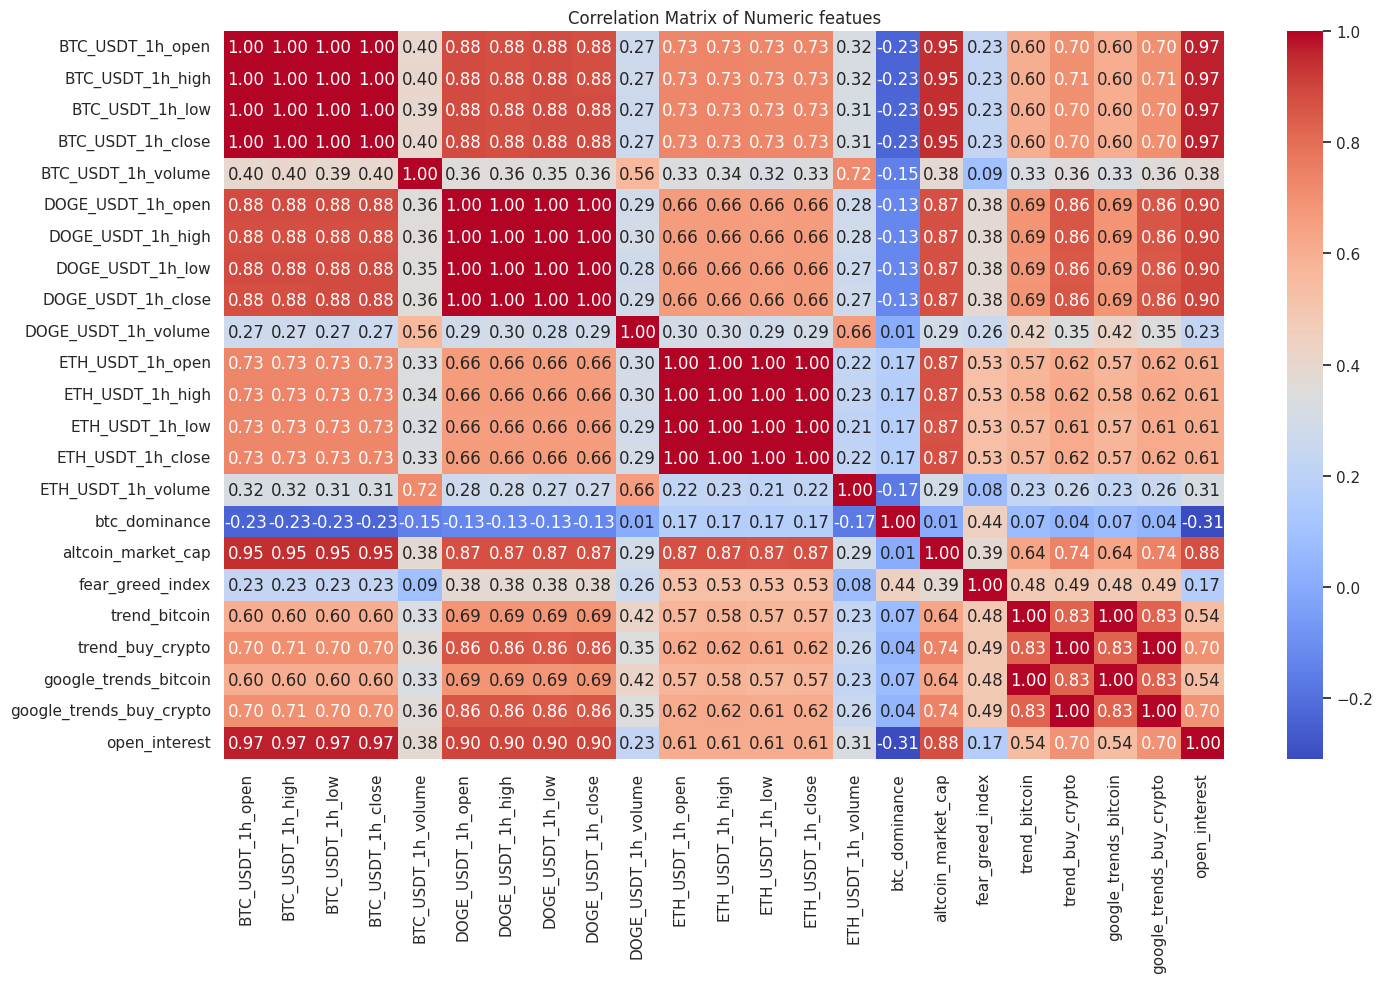

In [15]:
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1]>=4:
    plt.figure(figsize=(15,10))
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix,annot=True,fmt='.2f',cmap='coolwarm')
    plt.title(f'Correlation Matrix of Numeric featues')
    plt.tight_layout()
    plt.show()

Insight | Interpretation
> *  BTC/ETH/DOGE prices are tightly correlated                      `Suggests market moves together`
>
> * Volume does not correlate strongly with price                   `Not always indicative of bullish or bearish`
>
> * BTC dominance is negatively correlated with altcoin activity    `When BTC rises in dominance, altcoins suffer`
>
> * Google trends & sentiment data correlate with price             `More hype = more price volatility`
>
> * Open interest = big player activity = price movement            `Watch it for volatility prediction`

In [16]:
feat = ['timestamp', 'BTC_USDT_1h_open', 'BTC_USDT_1h_low',
       'BTC_USDT_1h_close', 'BTC_USDT_1h_volume', 'DOGE_USDT_1h_open',
       'DOGE_USDT_1h_low', 'DOGE_USDT_1h_close',
       'DOGE_USDT_1h_volume', 'ETH_USDT_1h_open',
       'ETH_USDT_1h_low', 'ETH_USDT_1h_close', 'ETH_USDT_1h_volume']

In [17]:
df = df.drop(columns=feat)

# Correlation Matrix after feature Selection

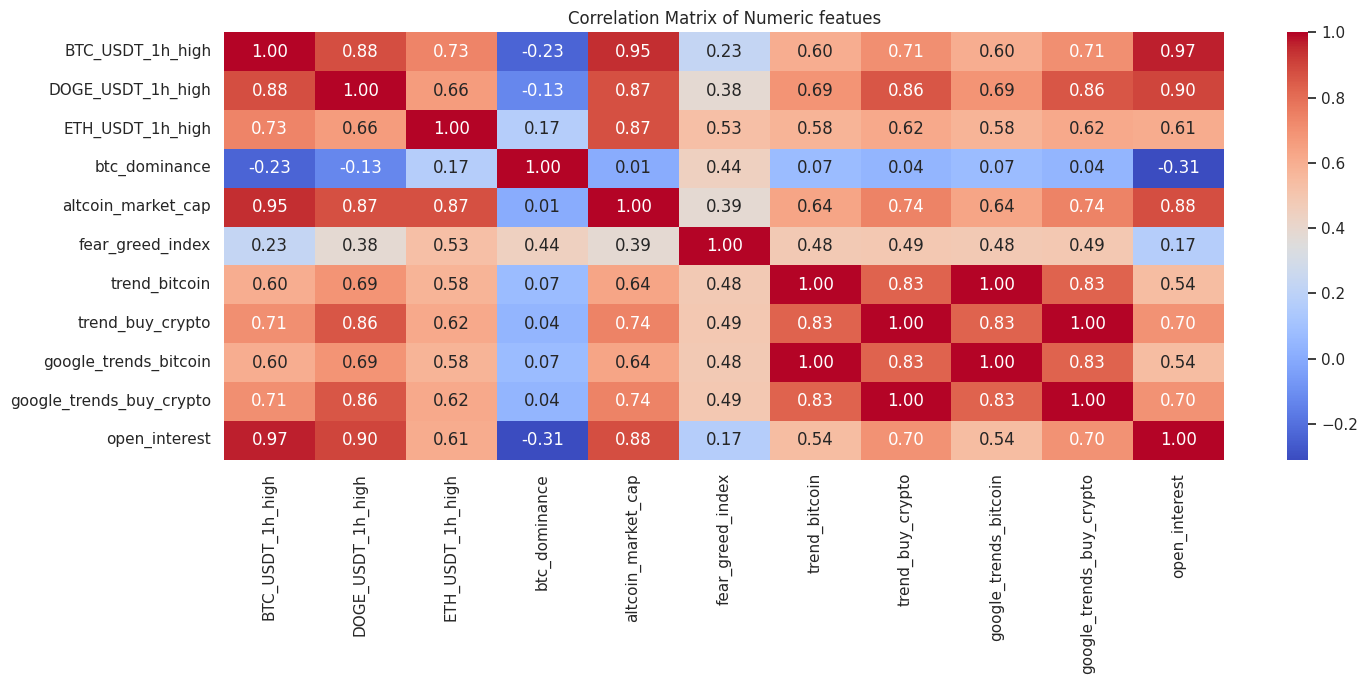

In [18]:
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1]>=4:
    plt.figure(figsize=(15,7))
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix,annot=True,fmt='.2f',cmap='coolwarm')
    plt.title(f'Correlation Matrix of Numeric featues')
    plt.tight_layout()
    plt.show()

# Model Section

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Nadam, Adadelta
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

2025-04-16 08:57:14.596231: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744793834.846523      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744793834.921228      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [20]:
X = df.drop(columns=['btc_dominance','open_interest'])
y = df['btc_dominance']

In [21]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
# Standardize (always standardize before PCA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
# Fit PCA on training data only
pca = PCA(n_components=0.95)  # Keep 95% variance
X_train_pca = pca.fit_transform(X_train_scaled)

In [24]:
# Transform test data using the same PCA model
X_test_pca = pca.transform(X_test_scaled)

In [25]:
# Build ANN for regression
model = Sequential()
model.add(Dense(64, input_shape=(X_train_pca.shape[1],), activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(1))  # ✅ No activation for regression output

# Compile for regression
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['r2_score'])  # or 'mape', 'mse'

# Train
history = model.fit(X_train_pca, y_train, epochs=100, batch_size=32, validation_data=(X_test_pca, y_test))


Epoch 1/100


2025-04-16 08:57:31.631411: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 173.2711 - r2_score: -25.2308 - val_loss: 5.4705 - val_r2_score: 0.1890
Epoch 2/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.0011 - r2_score: 0.2469 - val_loss: 4.7725 - val_r2_score: 0.2925
Epoch 3/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.4991 - r2_score: 0.3176 - val_loss: 4.4101 - val_r2_score: 0.3462
Epoch 4/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.6918 - r2_score: 0.3474 - val_loss: 4.2336 - val_r2_score: 0.3724
Epoch 5/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.0366 - r2_score: 0.3768 - val_loss: 4.1074 - val_r2_score: 0.3911
Epoch 6/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.1100 - r2_score: 0.4050 - val_loss: 3.8280 - val_r2_score: 0.4325
Epoch 7/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.7635 - r2_score: 0.4511 - val_loss: 3.5476 - val_r2_score: 0.4741
Epoch 8/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.6030 - r2_score: 0.4835 - val_loss: 3.3435

In [26]:
# Get predictions
y_pred = model.predict(X_test_pca).flatten()  # flatten in case of shape (n,1)

print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
MSE: 1.23787088114478
MAE: 0.7372952207990977
R² Score: 0.8164879331327592


# Plot Training VS Validation Loss

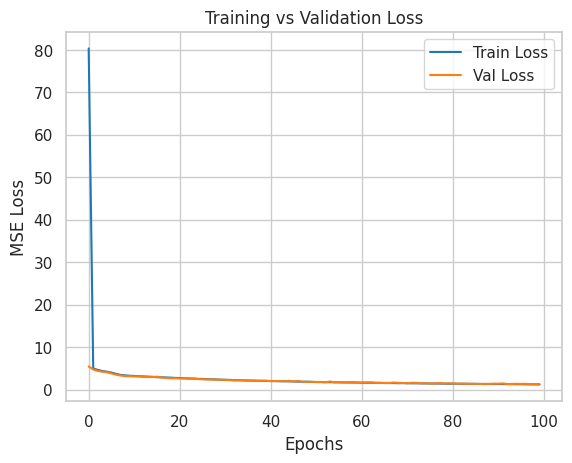

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()


**About plot**
> High loss at the start  `Normal — initial weights are random`
> 
> Sharp drop at the beginning  `Model is learning fast`
> 
> Smooth decline after that  `Learning continues but slower`
> 
> Train & Val losses close together  `Model generalizes well, no overfitting`
> 
> No sudden spikes or gaps  `Stable training`

# CONCLUSION:
> ACHEVING `~86%` R2-SCORE.
>
> Probably Getting high score if we use more epoches because no.of rows are very much.
>
> Probably if we use better features Most probalby gettting better socre.
>
>